1. **First, I will start by outlining the problems/questions I aim to answer through this Exploratory Data Analysis.**
2. **I have already scraped the specific data needed from FBref, stored in the Fbref_scrape.py file.**
3. **For analytical purposes, the extracted data has been saved in CSV format, with each CSV file stored in this very directory/folder.**
4. **In the next section, I will specify the questions I intend to answer through this EDA.**

#### Questions I aim to answer:
1. **xG vs. xGA: How Balanced Are Teams?**
2. **Team Offensive Efficiency: Which teams are the most efficient at converting xG into actual goals?**
3. **Team Defensive Performance: Which teams are the most effective at preventing goals based on xGA vs actual goals conceded?**
4. **Ball Progression and Chance Creation: Which teams are most effective at creating chances through progressive passes and progressive carries?**
5. **Defensive Actions vs Goals Conceded: Which teams' defensive metrics are most strongly correlated with fewer goals conceded?**
6. **Goalkeeper Performance Impact: How do teams' goalkeepers affect their defensive performance based on psxg vs actual goals conceded?**
7. **Shot Creation and Efficiency: Which teams are most efficient at converting shot attempts into goals?**

*Before I begin, I'll load the CSV files as pandas DataFrames and filter out as much redundant data as possible.*

In [1]:
#Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
overall =pd.read_csv('overall.csv')
goalkeeping_adv = pd.read_csv('goalkeeping_adv.csv')
goalkeeping_standard = pd.read_csv('goalkeeping_standard.csv')
squad_defensive = pd.read_csv('squad_defense.csv')
squad_creation = pd.read_csv('squad_goal_shot_creation.csv')
squad_passing = pd.read_csv('squad_passing.csv')
squad_possession = pd.read_csv('squad_possession.csv')
squad_shooting = pd.read_csv('squad_shooting.csv')

*Now, I'll begin examining each dataset to check for null values, duplicates, correlations, statistics, and any context that might be needed later when combining DataFrames.*

In [3]:
overall.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,52774,Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,53352,Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,36443,Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,56523,Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39,59665,Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish


In [4]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Attendance       20 non-null     int64  
 16  Top Team Scorer  20 non-null     object 
 17  Goalkeeper       2

In [5]:
overall.isna().sum()

Rk                  0
Squad               0
MP                  0
W                   0
D                   0
L                   0
GF                  0
GA                  0
GD                  0
Pts                 0
Pts/MP              0
xG                  0
xGA                 0
xGD                 0
xGD/90              0
Attendance          0
Top Team Scorer     0
Goalkeeper          0
Notes              10
dtype: int64

In [6]:
# It is clear that Notes contains context with regards to Injury or portrays finishes in Europe depending on the clubs league positioning come the end of the season. 
# Likewise, Top Team Scorer, Goalkeeper, Attendance, and Ranks are not really useful to my analysis, so I will drop these columns alongside Notes.
overall.drop(columns=['Rk','Attendance','Top Team Scorer','Goalkeeper','Notes'], inplace=True)

In [7]:
overall.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58
4,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39


In [8]:
overall.describe()

,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
count,20.0,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,2.000000e+01,2.000000e+01
mean,38.0,14.600000,8.8000,14.600000,53.550000,53.550000,0.000000,52.60000,1.384500,50.895000,50.89000,-7.105427e-16,1.110223e-17
std,0.0,6.762124,3.5333,6.451438,19.454332,16.223683,33.829293,19.34561,0.509401,15.336866,12.58612,2.658488e+01,6.996465e-01
min,38.0,5.000000,3.0000,2.000000,23.000000,26.000000,-61.000000,22.00000,0.580000,32.300000,24.60000,-4.320000e+01,-1.140000e+00
25%,38.0,10.500000,6.0000,11.750000,42.000000,43.750000,-20.000000,39.75000,1.045000,40.900000,42.35000,-1.780000e+01,-4.700000e-01
50%,38.0,13.000000,8.0000,14.500000,49.000000,53.500000,-2.000000,50.00000,1.315000,46.000000,53.25000,-3.800000e+00,-1.000000e-01
75%,38.0,17.250000,11.0000,18.000000,61.250000,63.000000,10.000000,60.75000,1.602500,56.975000,57.65000,8.000000e+00,2.100000e-01
max,38.0,29.000000,15.0000,27.000000,99.000000,84.000000,73.000000,93.00000,2.450000,88.700000,75.50000,6.400000e+01,1.680000e+00


In [9]:
overall.select_dtypes(exclude=['object']).corr()

,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W,NaN,1.000000,-0.347167,-0.858022,0.941549,-0.846085,0.947221,0.985222,0.985607,0.920159,-0.834275,0.925538,0.925345
D,NaN,-0.347167,1.000000,-0.183790,-0.201222,0.008447,-0.119768,-0.181409,-0.183698,-0.198251,0.023268,-0.125958,-0.126253
L,NaN,-0.858022,-0.183790,1.000000,-0.876687,0.882204,-0.927242,-0.933315,-0.932464,-0.855894,0.861708,-0.901125,-0.900761
GF,NaN,0.941549,-0.201222,-0.876687,1.000000,-0.796433,0.957023,0.950584,0.950818,0.958574,-0.836649,0.948586,0.948409
GA,NaN,-0.846085,0.008447,0.882204,-0.796433,1.000000,-0.937583,-0.885686,-0.884454,-0.766003,0.928097,-0.881084,-0.881131
GD,NaN,0.947221,-0.119768,-0.927242,0.957023,-0.937583,1.000000,0.971409,0.970953,0.918606,-0.926227,0.968053,0.967973
Pts,NaN,0.985222,-0.181409,-0.933315,0.950584,-0.885686,0.971409,1.000000,0.999985,0.928697,-0.870595,0.947541,0.947284
Pts/MP,NaN,0.985607,-0.183698,-0.932464,0.950818,-0.884454,0.970953,0.999985,1.000000,0.929209,-0.870082,0.947592,0.947337
xG,NaN,0.920159,-0.198251,-0.855894,0.958574,-0.766003,0.918606,0.928697,0.929209,1.000000,-0.812733,0.961145,0.961024


In [10]:
overall.duplicated().sum()

0

*The overall dataset is set, filtered and ready. Now, I'll repeat the process for rest of the datasets.*

In [11]:
goalkeeping_standard.head()

,Squad,# Pl,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,...,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1
0,Arsenal,2,38,38,3420,38.0,48,1.26,147,100,...,22,3,13,13,34.2,6,5,0,1,0.0
1,Aston Villa,3,38,38,3420,38.0,54,1.42,149,96,...,13,6,19,11,28.9,6,4,1,1,20.0
2,Brentford,3,38,38,3420,38.0,56,1.47,179,125,...,13,7,18,9,23.7,5,5,0,0,0.0
3,Brighton,2,38,38,3419,38.0,44,1.16,146,102,...,12,15,11,11,28.9,4,3,0,1,0.0
4,Burnley,2,38,38,3420,38.0,53,1.39,178,127,...,7,14,17,9,23.7,5,5,0,0,0.0


In [12]:
goalkeeping_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   MP       20 non-null     int64  
 3   Starts   20 non-null     int64  
 4   Min      20 non-null     int64  
 5   90s      20 non-null     float64
 6   GA       20 non-null     int64  
 7   GA90     20 non-null     float64
 8   SoTA     20 non-null     int64  
 9   Saves    20 non-null     int64  
 10  Save%    20 non-null     float64
 11  W        20 non-null     int64  
 12  D        20 non-null     int64  
 13  L        20 non-null     int64  
 14  CS       20 non-null     int64  
 15  CS%      20 non-null     float64
 16  PKatt    20 non-null     int64  
 17  PKA      20 non-null     int64  
 18  PKsv     20 non-null     int64  
 19  PKm      20 non-null     int64  
 20  Save%.1  19 non-null     float64
dtypes: float64(5), int

In [13]:
goalkeeping_standard.isnull().sum()


Squad      0
# Pl       0
MP         0
Starts     0
Min        0
90s        0
GA         0
GA90       0
SoTA       0
Saves      0
Save%      0
W          0
D          0
L          0
CS         0
CS%        0
PKatt      0
PKA        0
PKsv       0
PKm        0
Save%.1    1
dtype: int64

In [14]:
# so there is a null value here, lets find the club for which does not have this value
goalkeeping_standard[goalkeeping_standard['Save%.1'].isna()]['Squad']

10    Liverpool
Name: Squad, dtype: object

In [15]:
# so I know I do not have the penalty save percent info about Liverpool, but this does not bother me.
# so I'll drop/update the columns that are not needed here.

goalkeeping_standard = goalkeeping_standard[['Squad', 'GA', 'GA90', 'SoTA', 'Saves', 'Save%', 'CS', 'CS%']]


In [16]:
goalkeeping_standard.head()

,Squad,GA,GA90,SoTA,Saves,Save%,CS,CS%
0,Arsenal,48,1.26,147,100,70.7,13,34.2
1,Aston Villa,54,1.42,149,96,66.4,11,28.9
2,Brentford,56,1.47,179,125,71.5,9,23.7
3,Brighton,44,1.16,146,102,71.9,11,28.9
4,Burnley,53,1.39,178,127,73.0,9,23.7


In [17]:
goalkeeping_standard.describe()

,GA,GA90,SoTA,Saves,Save%,CS,CS%
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,53.550000,1.408000,163.050000,110.600000,70.145000,10.600000,27.90500
std,16.223683,0.427977,35.384319,21.392079,4.351222,4.761689,12.53032
min,26.000000,0.680000,85.000000,59.000000,62.200000,4.000000,10.50000
25%,43.750000,1.152500,145.500000,98.750000,66.350000,8.000000,21.10000
50%,53.500000,1.405000,166.000000,113.000000,70.450000,9.000000,23.70000
75%,63.000000,1.657500,184.250000,125.500000,72.450000,12.250000,32.25000
max,84.000000,2.210000,224.000000,146.000000,79.600000,21.000000,55.30000


In [18]:
goalkeeping_standard.select_dtypes(exclude='object').corr()

,GA,GA90,SoTA,Saves,Save%,CS,CS%
GA,1.000000,0.999986,0.930710,0.799259,-0.733409,-0.913346,-0.913031
GA90,0.999986,1.000000,0.930255,0.798581,-0.733736,-0.913637,-0.913326
SoTA,0.930710,0.930255,1.000000,0.962763,-0.465603,-0.928562,-0.928354
Saves,0.799259,0.798581,0.962763,1.000000,-0.233151,-0.854196,-0.854056
Save%,-0.733409,-0.733736,-0.465603,-0.233151,1.000000,0.563323,0.562548
CS,-0.913346,-0.913637,-0.928562,-0.854196,0.563323,1.000000,0.999996
CS%,-0.913031,-0.913326,-0.928354,-0.854056,0.562548,0.999996,1.000000


In [19]:
goalkeeping_standard.duplicated().sum()

0

In [20]:
#by now it has become clear that there can never be any duplicates because all the clubs playing in the premiere league are unique
goalkeeping_adv.head()

,Squad,# Pl,90s,GA,PKA,FK,CK,OG,PSxG,PSxG/SoT,...,AvgLen,Att.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Arsenal,2,38.0,48,5,0,3,1,47.6,0.29,...,33.8,251,63.7,48.3,487,32,6.6,61,1.61,7.3
1,Aston Villa,3,38.0,54,4,2,5,2,46.5,0.29,...,33.6,303,39.9,34.8,513,40,7.8,34,0.89,15.4
2,Brentford,3,38.0,56,5,1,8,2,49.4,0.25,...,36.2,300,61.0,45.2,626,37,5.9,58,1.53,15.8
3,Brighton,2,38.0,44,3,1,6,0,42.5,0.28,...,23.9,241,64.3,48.8,535,60,11.2,36,0.95,9.3
4,Burnley,2,38.0,53,5,1,7,2,47.5,0.25,...,50.8,304,91.1,61.3,642,46,7.2,84,2.21,17.0


In [21]:
goalkeeping_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Squad      20 non-null     object 
 1   # Pl       20 non-null     int64  
 2   90s        20 non-null     float64
 3   GA         20 non-null     int64  
 4   PKA        20 non-null     int64  
 5   FK         20 non-null     int64  
 6   CK         20 non-null     int64  
 7   OG         20 non-null     int64  
 8   PSxG       20 non-null     float64
 9   PSxG/SoT   20 non-null     float64
 10  PSxG+/-    20 non-null     float64
 11  /90        20 non-null     float64
 12  Cmp        20 non-null     int64  
 13  Att        20 non-null     int64  
 14  Cmp%       20 non-null     float64
 15  Att (GK)   20 non-null     int64  
 16  Thr        20 non-null     int64  
 17  Launch%    20 non-null     float64
 18  AvgLen     20 non-null     float64
 19  Att.1      20 non-null     int64  
 20  Launch%.1  2

In [22]:
#now I'll select the columns needed in my analysis 
goalkeeping_adv = goalkeeping_adv[['Squad','PSxG','PSxG/SoT','PSxG+/-','/90','Opp','Stp','Stp%','#OPA','#OPA/90','AvgDist']]

In [23]:
goalkeeping_adv.head()

,Squad,PSxG,PSxG/SoT,PSxG+/-,/90,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Arsenal,47.6,0.29,0.6,0.02,487,32,6.6,61,1.61,7.3
1,Aston Villa,46.5,0.29,-5.5,-0.14,513,40,7.8,34,0.89,15.4
2,Brentford,49.4,0.25,-4.6,-0.12,626,37,5.9,58,1.53,15.8
3,Brighton,42.5,0.28,-1.5,-0.04,535,60,11.2,36,0.95,9.3
4,Burnley,47.5,0.25,-3.5,-0.09,642,46,7.2,84,2.21,17.0


In [24]:
#now that the advcanced statistics for goalkeepers have been reduced, I can merge the standard and advanced statistics for the goalkeepers
goalkeeping = goalkeeping_standard.merge(goalkeeping_adv,on='Squad') 

In [25]:
goalkeeping.head()

,Squad,GA,GA90,SoTA,Saves,Save%,CS,CS%,PSxG,PSxG/SoT,PSxG+/-,/90,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Arsenal,48,1.26,147,100,70.7,13,34.2,47.6,0.29,0.6,0.02,487,32,6.6,61,1.61,7.3
1,Aston Villa,54,1.42,149,96,66.4,11,28.9,46.5,0.29,-5.5,-0.14,513,40,7.8,34,0.89,15.4
2,Brentford,56,1.47,179,125,71.5,9,23.7,49.4,0.25,-4.6,-0.12,626,37,5.9,58,1.53,15.8
3,Brighton,44,1.16,146,102,71.9,11,28.9,42.5,0.28,-1.5,-0.04,535,60,11.2,36,0.95,9.3
4,Burnley,53,1.39,178,127,73.0,9,23.7,47.5,0.25,-3.5,-0.09,642,46,7.2,84,2.21,17.0


In [26]:
goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Squad     20 non-null     object 
 1   GA        20 non-null     int64  
 2   GA90      20 non-null     float64
 3   SoTA      20 non-null     int64  
 4   Saves     20 non-null     int64  
 5   Save%     20 non-null     float64
 6   CS        20 non-null     int64  
 7   CS%       20 non-null     float64
 8   PSxG      20 non-null     float64
 9   PSxG/SoT  20 non-null     float64
 10  PSxG+/-   20 non-null     float64
 11  /90       20 non-null     float64
 12  Opp       20 non-null     int64  
 13  Stp       20 non-null     int64  
 14  Stp%      20 non-null     float64
 15  #OPA      20 non-null     int64  
 16  #OPA/90   20 non-null     float64
 17  AvgDist   20 non-null     float64
dtypes: float64(10), int64(7), object(1)
memory usage: 2.9+ KB


In [27]:
goalkeeping.isna().sum()

Squad       0
GA          0
GA90        0
SoTA        0
Saves       0
Save%       0
CS          0
CS%         0
PSxG        0
PSxG/SoT    0
PSxG+/-     0
/90         0
Opp         0
Stp         0
Stp%        0
#OPA        0
#OPA/90     0
AvgDist     0
dtype: int64

In [28]:
#to get the idea of correlations btw different metrics, say if a goalie keeps a clean sheet then it has a -.9 corr with Goals against because clean sheet implies 0 goals conceded
goalkeeping.select_dtypes(exclude='object').corr()

,GA,GA90,SoTA,Saves,Save%,CS,CS%,PSxG,PSxG/SoT,PSxG+/-,/90,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
GA,1.000000,0.999986,0.930710,0.799259,-0.733409,-0.913346,-0.913031,0.956788,0.330075,-0.806603,-0.805049,0.597694,-0.182052,-0.462903,-0.416008,-0.415559,0.078034
GA90,0.999986,1.000000,0.930255,0.798581,-0.733736,-0.913637,-0.913326,0.956515,0.329630,-0.806897,-0.805315,0.597135,-0.181842,-0.462309,-0.417260,-0.416818,0.077905
SoTA,0.930710,0.930255,1.000000,0.962763,-0.465603,-0.928562,-0.928354,0.963633,0.135703,-0.610156,-0.608866,0.670956,-0.133587,-0.465084,-0.363288,-0.362255,0.043553
Saves,0.799259,0.798581,0.962763,1.000000,-0.233151,-0.854196,-0.854056,0.882061,-0.016069,-0.412954,-0.411563,0.670985,-0.077986,-0.420622,-0.274567,-0.273358,0.022246
Save%,-0.733409,-0.733736,-0.465603,-0.233151,1.000000,0.563323,0.562548,-0.578904,-0.683632,0.809378,0.807846,-0.285542,0.174033,0.294330,0.412652,0.413367,0.019822
CS,-0.913346,-0.913637,-0.928562,-0.854196,0.563323,1.000000,0.999996,-0.940179,-0.220521,0.598243,0.595279,-0.739190,0.031750,0.387482,0.517411,0.516489,0.131618
CS%,-0.913031,-0.913326,-0.928354,-0.854056,0.562548,0.999996,1.000000,-0.940106,-0.220034,0.597687,0.594713,-0.739700,0.030425,0.386317,0.517250,0.516328,0.131842
PSxG,0.956788,0.956515,0.963633,0.882061,-0.578904,-0.940179,-0.940106,1.000000,0.330880,-0.606699,-0.605360,0.654675,-0.151842,-0.466974,-0.473263,-0.472183,-0.048963
PSxG/SoT,0.330075,0.329630,0.135703,-0.016069,-0.683632,-0.220521,-0.220034,0.330880,1.000000,-0.216548,-0.218472,0.046121,-0.032537,-0.050082,-0.362652,-0.362329,-0.272472
PSxG+/-,-0.806603,-0.806897,-0.610156,-0.412954,0.809378,0.598243,0.597687,-0.606699,-0.216548,1.000000,0.999808,-0.282037,0.160094,0.275464,0.177454,0.177918,-0.349596


In [29]:
goalkeeping.describe()

,GA,GA90,SoTA,Saves,Save%,CS,CS%,PSxG,PSxG/SoT,PSxG+/-,/90,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,53.550000,1.408000,163.050000,110.600000,70.145000,10.600000,27.90500,47.930000,0.270500,-3.920000,-0.103000,529.900000,30.550000,5.840000,44.95000,1.183500,14.080000
std,16.223683,0.427977,35.384319,21.392079,4.351222,4.761689,12.53032,11.453802,0.022355,5.781877,0.151626,89.894617,11.975743,2.134282,19.53802,0.514211,4.361868
min,26.000000,0.680000,85.000000,59.000000,62.200000,4.000000,10.50000,25.800000,0.220000,-15.600000,-0.410000,310.000000,8.000000,1.500000,12.00000,0.320000,5.500000
25%,43.750000,1.152500,145.500000,98.750000,66.350000,8.000000,21.10000,41.500000,0.257500,-6.050000,-0.155000,506.500000,22.750000,4.750000,33.75000,0.885000,10.700000
50%,53.500000,1.405000,166.000000,113.000000,70.450000,9.000000,23.70000,48.650000,0.270000,-2.500000,-0.065000,543.000000,29.500000,5.850000,42.00000,1.105000,14.200000
75%,63.000000,1.657500,184.250000,125.500000,72.450000,12.250000,32.25000,56.150000,0.290000,-0.350000,-0.010000,582.250000,37.750000,7.200000,55.00000,1.447500,17.025000
max,84.000000,2.210000,224.000000,146.000000,79.600000,21.000000,55.30000,67.600000,0.310000,7.300000,0.190000,642.000000,60.000000,11.200000,92.00000,2.420000,23.700000


In [30]:
squad_defensive.head()

,Squad,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,Arsenal,27,38.0,540,311,261,195,84,244,500,48.8,256,386,123,263,296,836,658,20
1,Aston Villa,31,38.0,634,382,300,259,75,300,649,46.2,349,453,140,313,339,973,693,13
2,Brentford,29,38.0,607,342,299,228,80,291,616,47.2,325,383,113,270,393,1000,863,7
3,Brighton,26,38.0,668,403,306,257,105,243,563,43.2,320,480,150,330,358,1026,723,12
4,Burnley,23,38.0,590,324,273,235,82,250,534,46.8,284,509,211,298,410,1000,887,18


In [31]:
squad_defensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   90s      20 non-null     float64
 3   Tkl      20 non-null     int64  
 4   TklW     20 non-null     int64  
 5   Def 3rd  20 non-null     int64  
 6   Mid 3rd  20 non-null     int64  
 7   Att 3rd  20 non-null     int64  
 8   Tkl.1    20 non-null     int64  
 9   Att      20 non-null     int64  
 10  Tkl%     20 non-null     float64
 11  Lost     20 non-null     int64  
 12  Blocks   20 non-null     int64  
 13  Sh       20 non-null     int64  
 14  Pass     20 non-null     int64  
 15  Int      20 non-null     int64  
 16  Tkl+Int  20 non-null     int64  
 17  Clr      20 non-null     int64  
 18  Err      20 non-null     int64  
dtypes: float64(2), int64(16), object(1)
memory usage: 3.1+ KB


In [32]:
#great so there seems to be no null/na values and as I've already proven there can be no duplicates in this data given the nature of the logical schema
#Now I'll trim this dataset so that I can work around with metrics I'd need

squad_defensive = squad_defensive[['Squad','Tkl','TklW','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']]

In [33]:
squad_defensive.head()

,Squad,Tkl,TklW,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,Arsenal,540,311,386,123,263,296,836,658,20
1,Aston Villa,634,382,453,140,313,339,973,693,13
2,Brentford,607,342,383,113,270,393,1000,863,7
3,Brighton,668,403,480,150,330,358,1026,723,12
4,Burnley,590,324,509,211,298,410,1000,887,18


In [34]:
# To measure any defensive impact I need to have Goals Against and Expected Goals Against in my data frame, therefore I'm going to merge datasets again
defenses = squad_defensive.merge(overall[['Squad','GA','xGA']],on='Squad')

In [35]:
defenses.head()

,Squad,Tkl,TklW,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,GA,xGA
0,Arsenal,540,311,386,123,263,296,836,658,20,48,45.7
1,Aston Villa,634,382,453,140,313,339,973,693,13,54,49.0
2,Brentford,607,342,383,113,270,393,1000,863,7,56,48.5
3,Brighton,668,403,480,150,330,358,1026,723,12,44,42.9
4,Burnley,590,324,509,211,298,410,1000,887,18,53,57.1


In [36]:
squad_creation.head()

,Squad,# Pl,90s,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1
0,Arsenal,27,38.0,1030,27.11,788,68,57,66,39,12,99,2.61,69,8,4,13,4,1
1,Aston Villa,31,38.0,837,22.03,608,85,49,41,48,6,93,2.45,65,9,9,7,3,0
2,Brentford,29,38.0,739,19.45,487,96,37,62,43,14,78,2.05,46,11,4,8,9,0
3,Brighton,26,38.0,870,22.89,630,84,49,55,40,12,72,1.89,49,8,4,6,4,1
4,Burnley,23,38.0,674,17.74,455,81,28,50,50,10,60,1.58,39,9,5,3,4,0


In [37]:
# This dataframe, includes Shot Creating Actions/Goal Creating Actions and the actions that lead to them.
squad_creation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Squad       20 non-null     object 
 1   # Pl        20 non-null     int64  
 2   90s         20 non-null     float64
 3   SCA         20 non-null     int64  
 4   SCA90       20 non-null     float64
 5   PassLive    20 non-null     int64  
 6   PassDead    20 non-null     int64  
 7   TO          20 non-null     int64  
 8   Sh          20 non-null     int64  
 9   Fld         20 non-null     int64  
 10  Def         20 non-null     int64  
 11  GCA         20 non-null     int64  
 12  GCA90       20 non-null     float64
 13  PassLive.1  20 non-null     int64  
 14  PassDead.1  20 non-null     int64  
 15  TO.1        20 non-null     int64  
 16  Sh.1        20 non-null     int64  
 17  Fld.1       20 non-null     int64  
 18  Def.1       20 non-null     int64  
dtypes: float64(3), int64(15), objec

In [38]:
#So no null values or duplicates(logical schema scheme)

squad_creation.describe()

,# Pl,90s,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,27.300000,38.0,846.750000,22.283500,616.550000,70.150000,49.700000,55.050000,42.650000,12.650000,89.600000,2.358000,62.400000,6.200000,5.500000,8.500000,5.600000,1.400000
std,2.494204,0.0,182.156346,4.793297,156.315294,15.878735,10.058251,17.839858,6.737757,3.360373,33.847024,0.890799,27.250109,3.019237,2.188487,4.430754,2.303316,1.273206
min,23.000000,38.0,637.000000,16.760000,435.000000,41.000000,28.000000,33.000000,28.000000,6.000000,35.000000,0.920000,27.000000,2.000000,1.000000,1.000000,2.000000,0.000000
25%,25.750000,38.0,732.000000,19.265000,499.000000,62.750000,43.000000,42.000000,39.000000,10.750000,67.500000,1.777500,42.750000,3.750000,4.000000,6.750000,4.000000,0.000000
50%,27.000000,38.0,792.000000,20.840000,577.000000,68.000000,48.000000,50.500000,43.000000,12.000000,79.500000,2.090000,51.000000,5.500000,5.000000,8.000000,5.000000,1.000000
75%,29.000000,38.0,890.750000,23.440000,685.000000,81.000000,56.250000,61.250000,49.000000,15.250000,104.250000,2.745000,78.000000,9.000000,6.250000,9.250000,8.000000,2.250000
max,33.000000,38.0,1286.000000,33.840000,997.000000,105.000000,70.000000,104.000000,52.000000,19.000000,163.000000,4.290000,121.000000,11.000000,10.000000,19.000000,9.000000,4.000000


In [39]:
# SO what constitutes the overall SCA/GCA (example: dead ball situation is not much helpful in my context), so I'll eliminate these columns except for live passes.
squad_creation=squad_creation[['Squad','SCA','SCA90','PassLive','TO','Sh','Def','GCA','GCA90','PassLive.1','TO.1','Sh.1','Def.1']]

In [40]:
squad_creation.head()

,Squad,SCA,SCA90,PassLive,TO,Sh,Def,GCA,GCA90,PassLive.1,TO.1,Sh.1,Def.1
0,Arsenal,1030,27.11,788,57,66,12,99,2.61,69,4,13,1
1,Aston Villa,837,22.03,608,49,41,6,93,2.45,65,9,7,0
2,Brentford,739,19.45,487,37,62,14,78,2.05,46,4,8,0
3,Brighton,870,22.89,630,49,55,12,72,1.89,49,4,6,1
4,Burnley,674,17.74,455,28,50,10,60,1.58,39,5,3,0


In [41]:
#Great, now this will help me immensely when analysing open play efficiency in terms of creation
squad_creation.columns

Index(['Squad', 'SCA', 'SCA90', 'PassLive', 'TO', 'Sh', 'Def', 'GCA', 'GCA90',
       'PassLive.1', 'TO.1', 'Sh.1', 'Def.1'],
      dtype='object')

In [42]:
#Cumulative Open Play SCA
squad_creation['OpSCA'] = squad_creation[['PassLive', 'TO', 'Sh', 'Def']].sum(axis=1)
#Cumulative Open Play GCA
squad_creation['OpGCA'] = squad_creation[['PassLive.1', 'TO.1', 'Sh.1', 'Def.1']].sum(axis=1)



In [43]:
#I can replace a lot of columns with just this now.
squad_creation = squad_creation[['Squad','SCA','SCA90','OpSCA','GCA','GCA90','OpGCA']]

In [44]:
squad_creation.head()

,Squad,SCA,SCA90,OpSCA,GCA,GCA90,OpGCA
0,Arsenal,1030,27.11,923,99,2.61,87
1,Aston Villa,837,22.03,704,93,2.45,81
2,Brentford,739,19.45,600,78,2.05,58
3,Brighton,870,22.89,746,72,1.89,60
4,Burnley,674,17.74,543,60,1.58,47


In [45]:
# Now to judge open play efficiency I have to add GF and xG to this schema.
creative_actions = squad_creation.merge(overall[['Squad','GF','xG']],on='Squad')

In [46]:
creative_actions.head()

,Squad,SCA,SCA90,OpSCA,GCA,GCA90,OpGCA,GF,xG
0,Arsenal,1030,27.11,923,99,2.61,87,61,60.5
1,Aston Villa,837,22.03,704,93,2.45,81,52,44.0
2,Brentford,739,19.45,600,78,2.05,58,48,45.8
3,Brighton,870,22.89,746,72,1.89,60,42,46.2
4,Burnley,674,17.74,543,60,1.58,47,34,39.7


In [47]:
# Now let's focus on possession and passing stats
squad_passing.head()

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,...,Cmp%.3,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,Arsenal,27,38.0,16176,19843,81.5,280868,91114,7325,8210,...,51.3,41,40.2,34.6,0.8,437,1354,329,74,1655
1,Aston Villa,31,38.0,12748,16499,77.3,220973,85405,5916,6803,...,48.2,42,34.8,30.0,7.2,356,1019,293,70,1300
2,Brentford,29,38.0,11676,16272,71.8,211867,85983,5201,6312,...,47.6,33,33.0,33.8,0.0,311,942,262,81,1189
3,Brighton,26,38.0,16410,20588,79.7,288827,95307,7195,8172,...,53.5,30,32.3,31.5,-2.3,356,1187,342,72,1547
4,Burnley,23,38.0,9454,14107,67.0,178791,80195,4297,5327,...,45.3,26,31.2,28.0,-5.2,286,877,240,84,972


In [48]:
squad_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   90s      20 non-null     float64
 3   Cmp      20 non-null     int64  
 4   Att      20 non-null     int64  
 5   Cmp%     20 non-null     float64
 6   TotDist  20 non-null     int64  
 7   PrgDist  20 non-null     int64  
 8   Cmp.1    20 non-null     int64  
 9   Att.1    20 non-null     int64  
 10  Cmp%.1   20 non-null     float64
 11  Cmp.2    20 non-null     int64  
 12  Att.2    20 non-null     int64  
 13  Cmp%.2   20 non-null     float64
 14  Cmp.3    20 non-null     int64  
 15  Att.3    20 non-null     int64  
 16  Cmp%.3   20 non-null     float64
 17  Ast      20 non-null     int64  
 18  xAG      20 non-null     float64
 19  xA       20 non-null     float64
 20  A-xAG    20 non-null     float64
 21  KP       20 non-nu

In [49]:
#so no null values.
squad_passing['PPA'] = squad_passing['PPA'] + squad_passing['CrsPA']

In [50]:

squad_passing = squad_passing[['Squad','Cmp','Att','Cmp%','Ast','xA','KP','1/3','PPA','PrgP']]

In [51]:
squad_passing.head()

,Squad,Cmp,Att,Cmp%,Ast,xA,KP,1/3,PPA,PrgP
0,Arsenal,16176,19843,81.5,41,34.6,437,1354,403,1655
1,Aston Villa,12748,16499,77.3,42,30.0,356,1019,363,1300
2,Brentford,11676,16272,71.8,33,33.8,311,942,343,1189
3,Brighton,16410,20588,79.7,30,31.5,356,1187,414,1547
4,Burnley,9454,14107,67.0,26,28.0,286,877,324,972


In [52]:
#now to sort the possession data
squad_possession.head()

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,Arsenal,27,52.8,38.0,23780,2227,7151,10336,6491,982,...,13993,73530,39388,734,494,223,557,337,16066,1642
1,Aston Villa,31,46.5,38.0,20609,2411,6876,8896,5049,825,...,11796,62511,31674,653,422,166,595,344,12668,1293
2,Brentford,29,44.8,38.0,20462,2793,7862,8201,4566,819,...,10280,49925,26085,450,332,102,563,291,11565,1170
3,Brighton,26,54.4,38.0,24854,2629,8034,10520,6505,876,...,13919,68537,35095,676,519,139,598,349,16278,1529
4,Burnley,23,40.2,38.0,18371,2247,5842,8051,4686,663,...,8229,42272,19061,388,300,84,540,291,9342,958


In [53]:
squad_possession.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   Poss     20 non-null     float64
 3   90s      20 non-null     float64
 4   Touches  20 non-null     int64  
 5   Def Pen  20 non-null     int64  
 6   Def 3rd  20 non-null     int64  
 7   Mid 3rd  20 non-null     int64  
 8   Att 3rd  20 non-null     int64  
 9   Att Pen  20 non-null     int64  
 10  Live     20 non-null     int64  
 11  Att      20 non-null     int64  
 12  Succ     20 non-null     int64  
 13  Succ%    20 non-null     float64
 14  Tkld     20 non-null     int64  
 15  Tkld%    20 non-null     float64
 16  Carries  20 non-null     int64  
 17  TotDist  20 non-null     int64  
 18  PrgDist  20 non-null     int64  
 19  PrgC     20 non-null     int64  
 20  1/3      20 non-null     int64  
 21  CPA      20 non-nu

In [54]:
# no null objects which is good.
# now to trim data 

squad_possession = squad_possession[['Squad','Poss','Att','Succ','Succ%','PrgC','1/3','CPA']]

In [55]:
squad_possession.head()

,Squad,Poss,Att,Succ,Succ%,PrgC,1/3,CPA
0,Arsenal,52.8,590,319,54.1,734,494,223
1,Aston Villa,46.5,587,333,56.7,653,422,166
2,Brentford,44.8,476,262,55.0,450,332,102
3,Brighton,54.4,559,317,56.7,676,519,139
4,Burnley,40.2,479,258,53.9,388,300,84


In [56]:
#shooting stats
squad_shooting.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,27,38.0,60,581,186,32.0,15.29,4.89,0.09,0.30,17.8,21,5,8,60.5,55.1,0.10,-0.5,-0.1
1,Aston Villa,31,38.0,50,461,159,34.5,12.13,4.18,0.10,0.30,17.6,20,3,3,44.0,42.0,0.09,6.0,5.0
2,Brentford,29,38.0,46,436,141,32.3,11.47,3.71,0.09,0.28,16.3,11,6,6,45.8,41.1,0.10,0.2,-1.1
3,Brighton,26,38.0,40,482,141,29.3,12.68,3.71,0.07,0.26,17.7,15,4,7,46.2,40.7,0.09,-6.2,-4.7
4,Burnley,23,38.0,32,405,119,29.4,10.66,3.13,0.08,0.26,17.2,14,1,2,39.7,38.1,0.10,-7.7,-7.1


In [57]:
squad_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   90s      20 non-null     float64
 3   Gls      20 non-null     int64  
 4   Sh       20 non-null     int64  
 5   SoT      20 non-null     int64  
 6   SoT%     20 non-null     float64
 7   Sh/90    20 non-null     float64
 8   SoT/90   20 non-null     float64
 9   G/Sh     20 non-null     float64
 10  G/SoT    20 non-null     float64
 11  Dist     20 non-null     float64
 12  FK       20 non-null     int64  
 13  PK       20 non-null     int64  
 14  PKatt    20 non-null     int64  
 15  xG       20 non-null     float64
 16  npxG     20 non-null     float64
 17  npxG/Sh  20 non-null     float64
 18  G-xG     20 non-null     float64
 19  np:G-xG  20 non-null     float64
dtypes: float64(12), int64(7), object(1)
memory usage: 3.3+ K

In [58]:
#no null/na values which is good.
#now to trim the dataframe

squad_shooting = squad_shooting[['Squad','Gls','Sh','SoT','Sh/90','SoT/90','G/Sh','G/SoT','xG','npxG','npxG/Sh']]

In [59]:
squad_shooting.head()

,Squad,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh
0,Arsenal,60,581,186,15.29,4.89,0.09,0.30,60.5,55.1,0.10
1,Aston Villa,50,461,159,12.13,4.18,0.10,0.30,44.0,42.0,0.09
2,Brentford,46,436,141,11.47,3.71,0.09,0.28,45.8,41.1,0.10
3,Brighton,40,482,141,12.68,3.71,0.07,0.26,46.2,40.7,0.09
4,Burnley,32,405,119,10.66,3.13,0.08,0.26,39.7,38.1,0.10


In [60]:
# Great so now I'm done with trimming of the datasets.

*Now that I'm done with filtering, combining data, let me start with checking the distribution of necessary metrics using different variety of plots.*

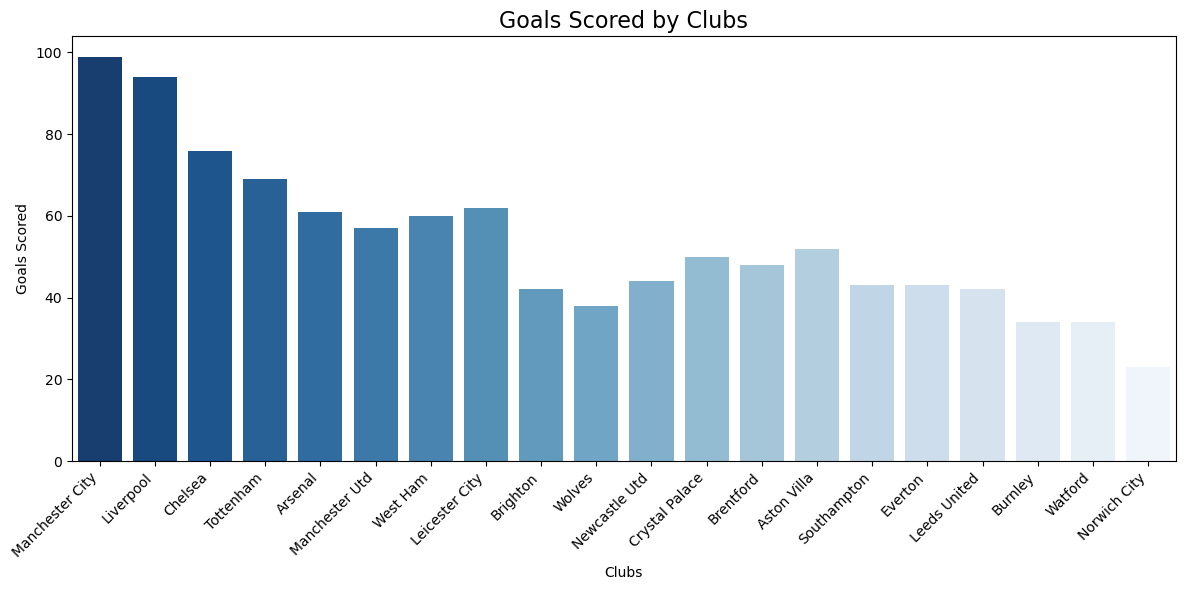

In [61]:
#first the values of goals scored by each club
# Set plot size
plt.figure(figsize=(12, 6))

# Create a simple barplot
sns.barplot(x='Squad', y='GF', hue='Squad', legend= False, data=overall, palette='Blues_r')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add title and axis labels
plt.title('Goals Scored by Clubs', fontsize=16)
plt.xlabel('Clubs')
plt.ylabel('Goals Scored')

# Display plot
plt.tight_layout()
plt.show()


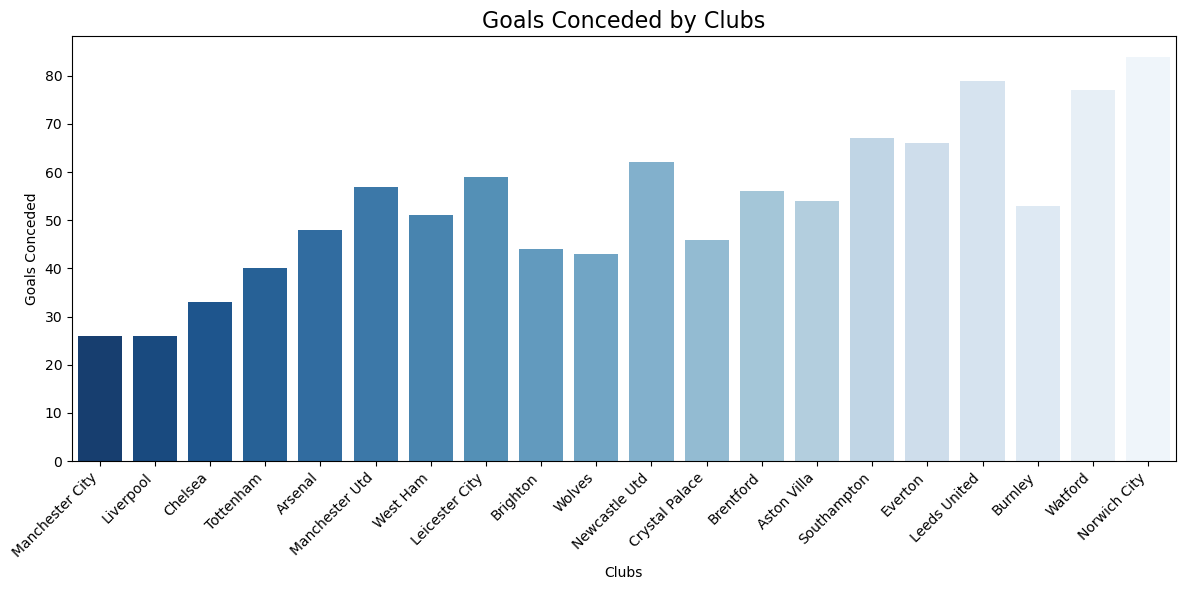

In [62]:

plt.figure(figsize=(12, 6))

plot = sns.barplot(x='Squad', y='GA', data=overall, hue='Squad', palette='Blues_r', legend=False)

plt.xticks(rotation=45, ha='right')

plt.title('Goals Conceded by Clubs', fontsize=16)
plt.xlabel('Clubs')
plt.ylabel('Goals Conceded')

plt.tight_layout()
plt.show()

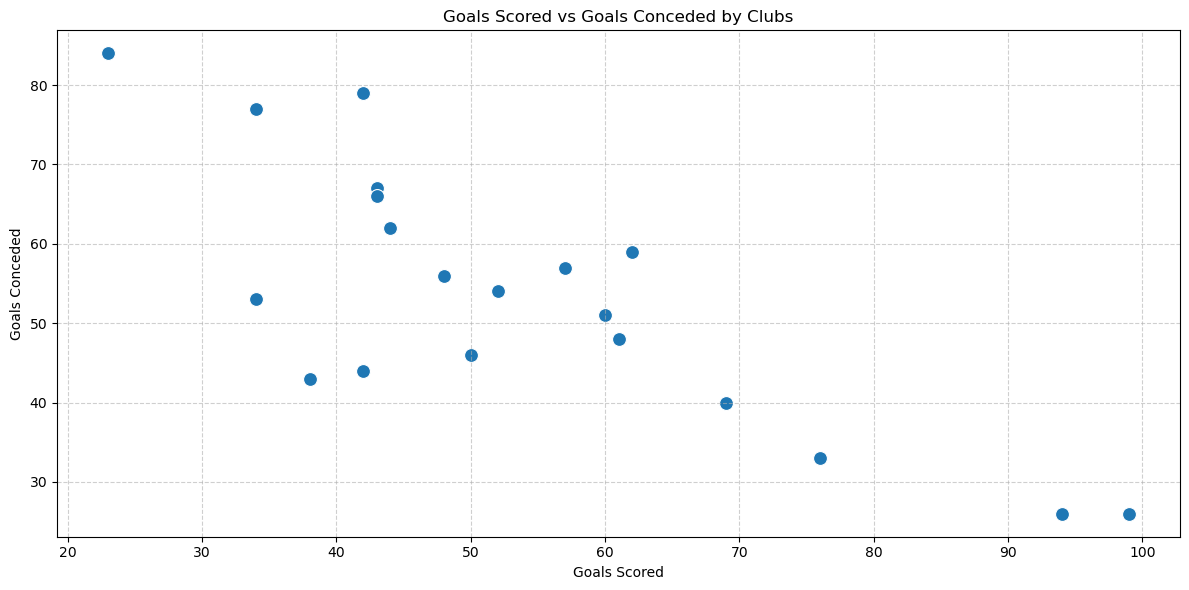

In [63]:
#now lets try to plot goals scored against goals conceded to have a look at how teams did

plt.figure(figsize=(12,6))
sns.scatterplot(x='GF', y='GA', data=overall, legend=False, s=100, edgecolor='w')

# Adding title and labels
plt.title('Goals Scored vs Goals Conceded by Clubs')
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [64]:
overall[(overall['GF'] > 70) | (overall['GA'] > 70)]['Squad']

0     Manchester City
1           Liverpool
2             Chelsea
16       Leeds United
18            Watford
19       Norwich City
Name: Squad, dtype: object

##### As observed the teams that have scored above 70 are also a part of the top 3, whilst teams that have conceded above 70 are part of the bottom 4

**There is a direct relation between teams scoring and teams conceding that will impact their league positions, however, Goals scored vs Goals against doesn't quite tell
the complete story. I will use better metrics, such as xG(Expected Goals) vs xGA(Expected Goals against) to answer the first question of my analysis**

In [65]:
overall.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58
4,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39


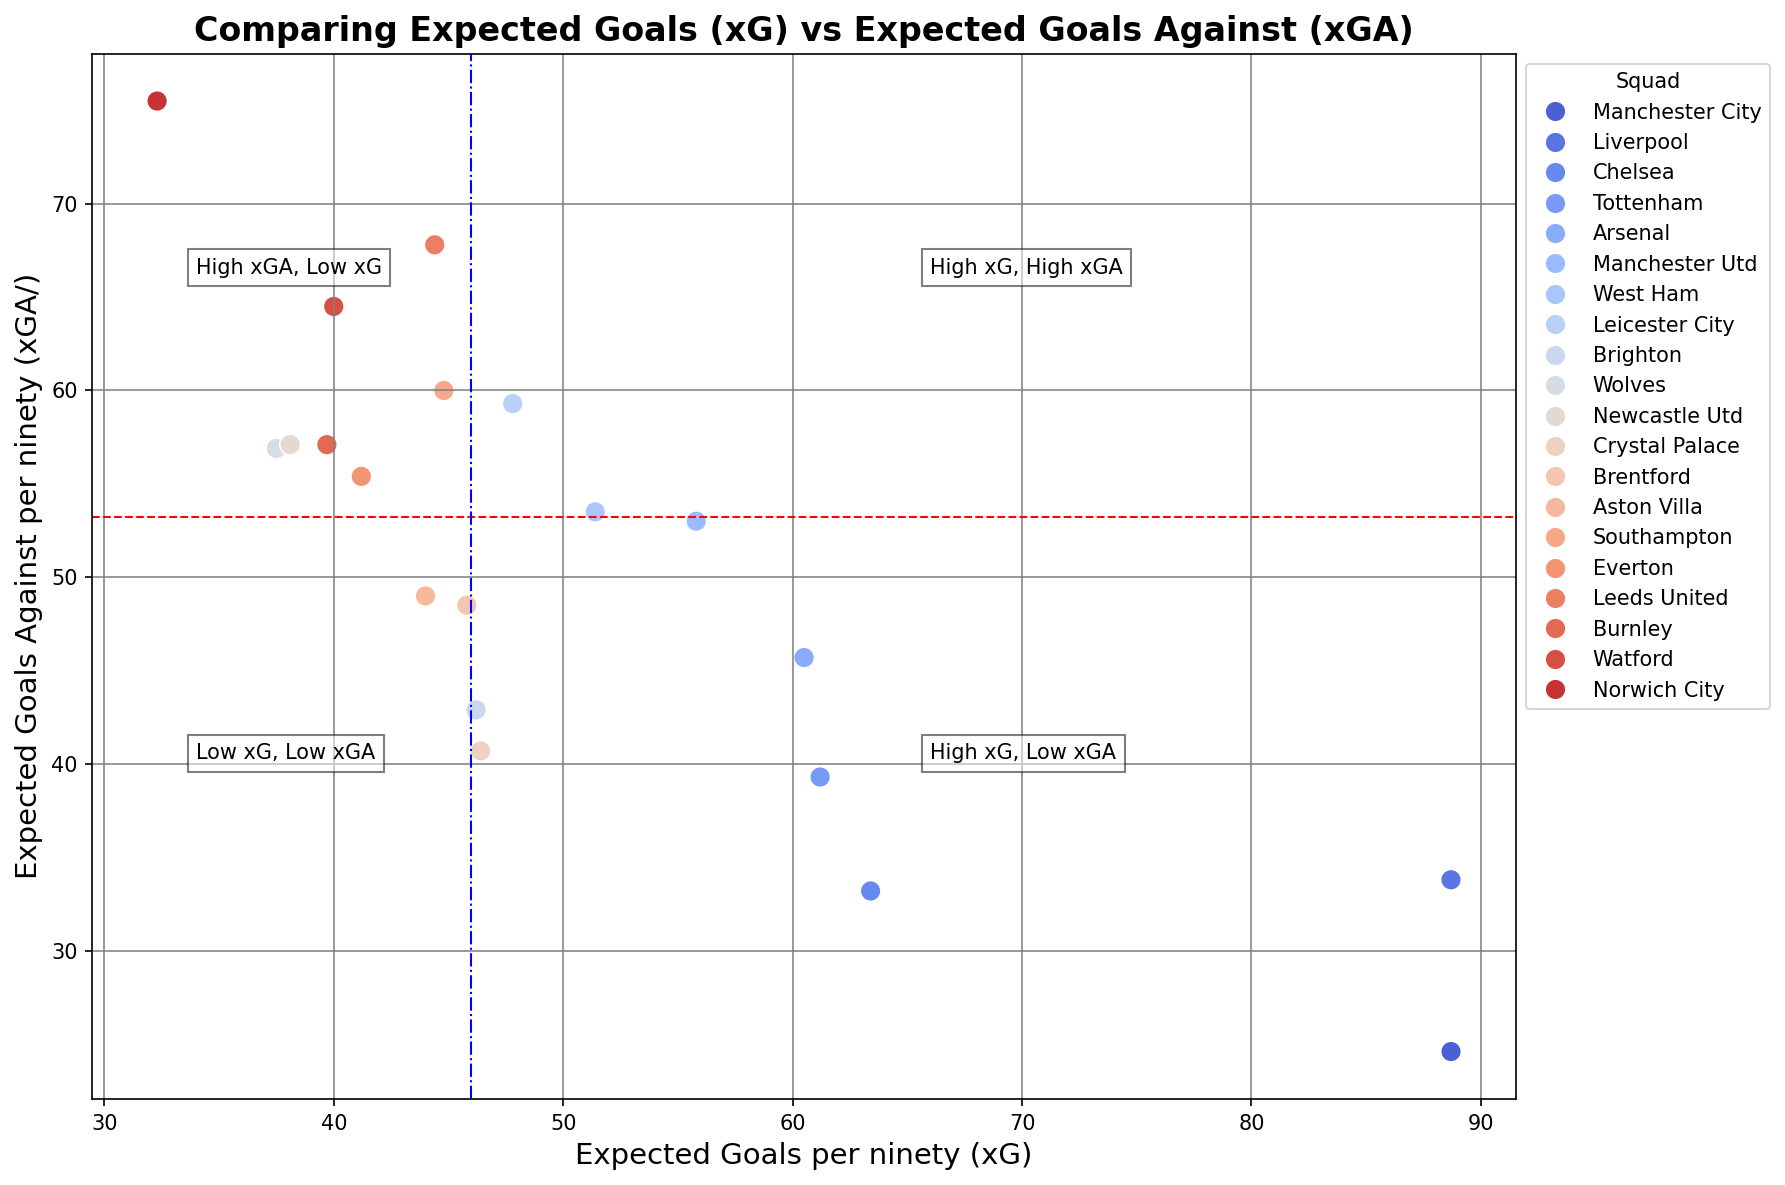

In [66]:
median_xG = overall['xG'].median()
median_xGA = overall['xGA'].median()


plt.figure(figsize=(12,8),dpi=150)
ax = sns.scatterplot(x='xG', y='xGA', data=overall, hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.axhline(y=median_xGA, color='r', linestyle='--', linewidth=1)
plt.axvline(x=median_xG, color='b', linestyle='-.', linewidth=1)


plt.title('Comparing Expected Goals (xG) vs Expected Goals Against (xGA)', fontsize=16, fontweight='bold')
plt.xlabel('Expected Goals per ninety (xG)', fontsize=14)
plt.ylabel('Expected Goals Against per ninety (xGA/)', fontsize=14)

plt.text(median_xG - 12 , median_xGA + 13 , 'High xGA, Low xG', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_xG + 20, median_xGA + 13 , 'High xG, High xGA', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_xG + 20, median_xGA - 13, 'High xG, Low xGA', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_xG - 12, median_xGA - 13, 'Low xG, Low xGA', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.tight_layout()
plt.show()

In [67]:
#I'll double down on this by computing the ratio of xG/xGA
overall['xG/xGA'] = overall['xG']/overall['xGA']

In [68]:
overall.sort_values(by = 'xG/xGA', ascending=False).head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA
0,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,3.605691
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,2.624260
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,1.909639
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,1.557252
4,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39,1.323851


In [69]:
overall.nsmallest(columns='xG/xGA',n=5)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA
19,Norwich City,38,5,7,26,23,84,-61,22,0.58,32.3,75.5,-43.2,-1.14,0.427815
18,Watford,38,6,5,27,34,77,-43,23,0.61,40.0,64.5,-24.5,-0.64,0.620155
16,Leeds United,38,9,11,18,42,79,-37,38,1.00,44.4,67.8,-23.5,-0.62,0.654867
9,Wolves,38,15,6,17,38,43,-5,51,1.34,37.5,56.9,-19.4,-0.51,0.659051
10,Newcastle Utd,38,13,10,15,44,62,-18,49,1.29,38.1,57.1,-19.0,-0.50,0.667250


1. **xG vs. xGA: How Balanced Are Teams?**

 **Manchester City stands out as the most balanced team, excelling both in generating high-quality chances and minimizing the chances conceded. Liverpool, while also performing well, has benefited from a degree of luck, as they have conceded fewer goals per mathc than expected. Chelsea is another top performer in terms of balance. On the other end of the spectrum, Norwich City is the poorest performer, with a significant imbalance between their low xG and high xGA. watford and Leeds United also face challenges, but Norwich City remains the least balanced of all.**

*Now, I'll begin working on answering the remaining problems. All I have to do, is fetch data, correlate it to metrics and conduct deduction based tests. Let me get to it.*

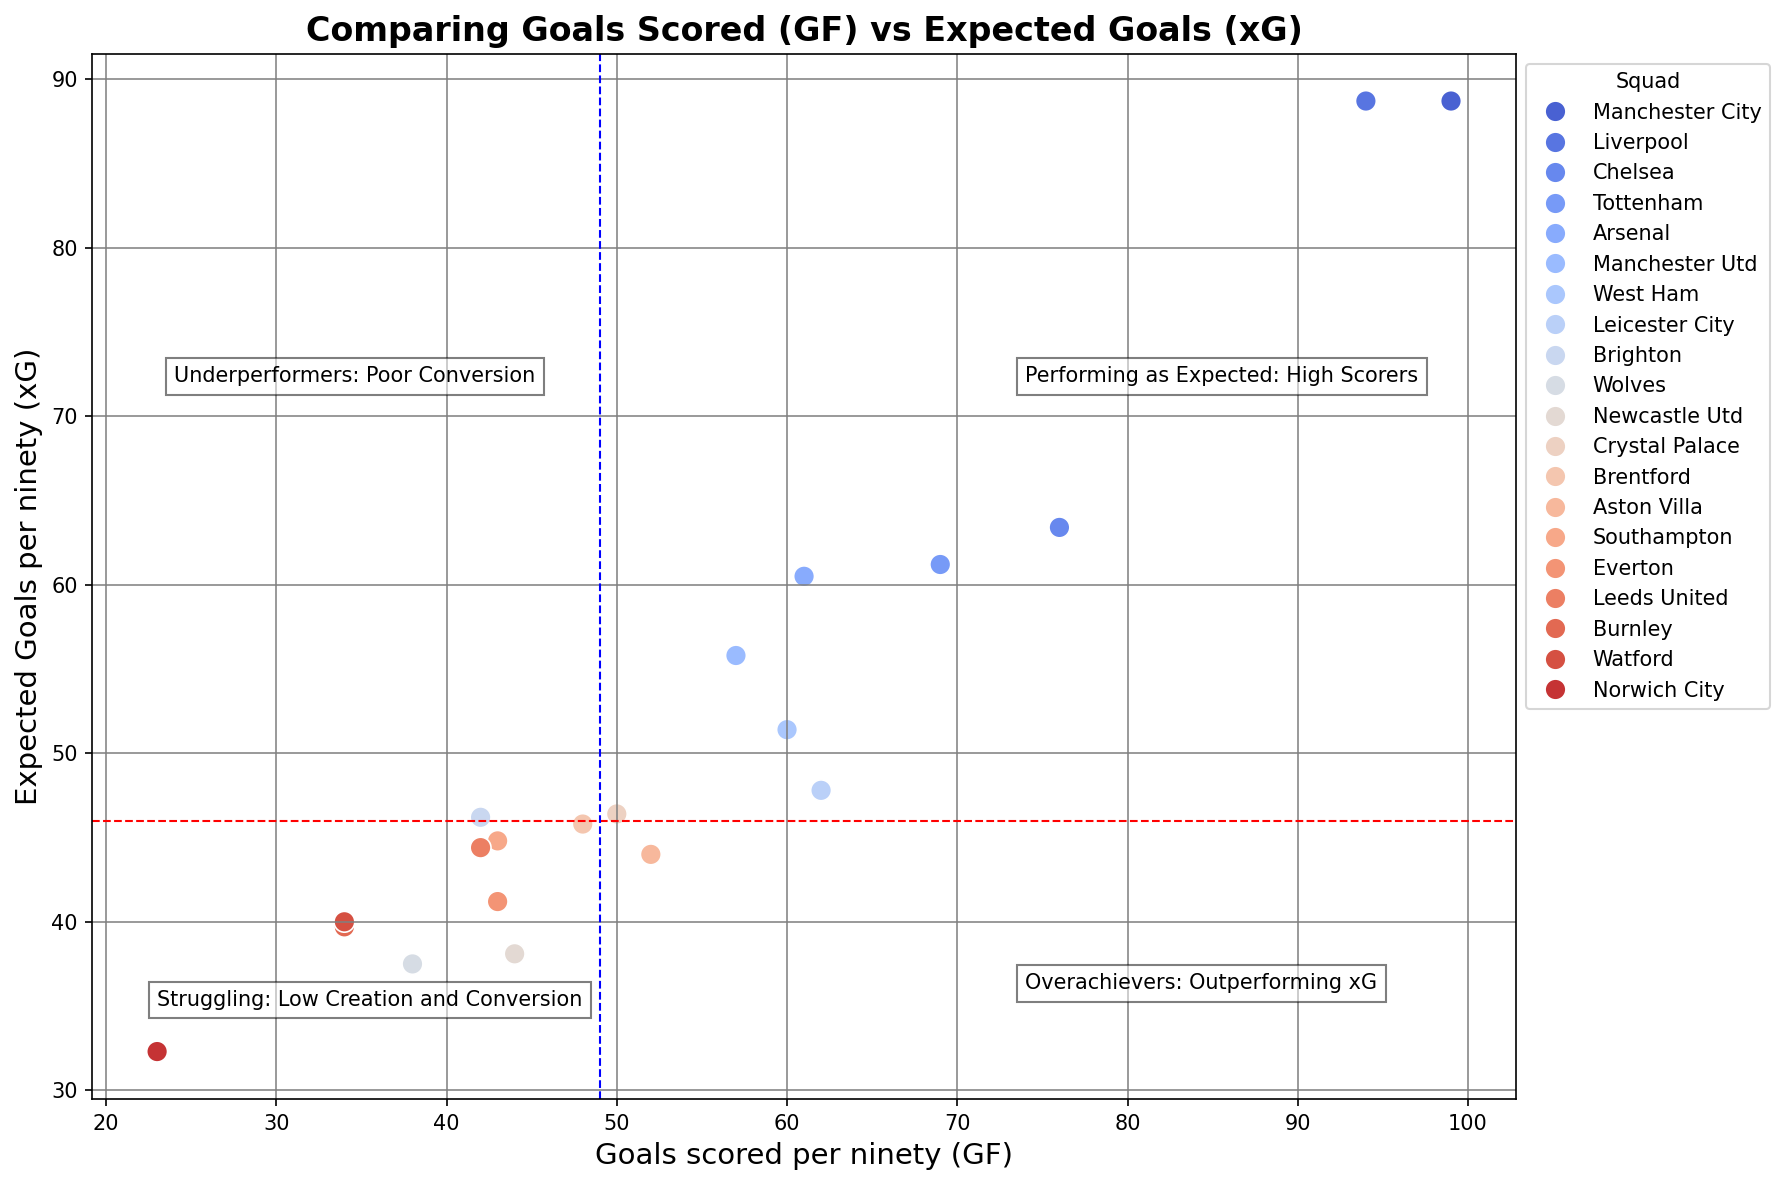

In [70]:
median_GF = overall['GF'].median()
median_xG = overall['xG'].median()


plt.figure(figsize=(12,8),dpi=150)
ax = sns.scatterplot(x='GF', y='xG', data=overall, hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.axhline(y=median_xG, color='r', linestyle = '--', lw=1)  
plt.axvline(x=median_GF, color='b', linestyle = '--', lw=1)

plt.title('Comparing Goals Scored (GF) vs Expected Goals (xG)', fontsize=16, fontweight='bold')
plt.xlabel('Goals scored per ninety (GF)', fontsize=14)
plt.ylabel('Expected Goals per ninety (xG)', fontsize=14)


plt.text(median_GF - 25, median_xG + 26, 'Underperformers: Poor Conversion', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GF + 25, median_xG + 26, 'Performing as Expected: High Scorers', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GF + 25, median_xG - 10, 'Overachievers: Outperforming xG', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GF - 26, median_xG - 11, 'Struggling: Low Creation and Conversion', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.tight_layout()
plt.show()

In [71]:
#I'll double down on this by calculating the GF/xG ratio
overall['GF/xG'] = overall['GF'] / overall['xG']

In [72]:
overall[overall['GF/xG'] >= 1][['Squad','GF/xG']]

,Squad,GF/xG
0,Manchester City,1.116122
1,Liverpool,1.059752
2,Chelsea,1.198738
3,Tottenham,1.127451
4,Arsenal,1.008264
5,Manchester Utd,1.021505
6,West Ham,1.167315
7,Leicester City,1.297071
9,Wolves,1.013333
10,Newcastle Utd,1.154856


In [73]:
overall.nlargest(columns='GF/xG',n=5)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA,GF/xG
7,Leicester City,38,14,10,14,62,59,3,52,1.37,47.8,59.3,-11.5,-0.30,0.806071,1.297071
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,1.909639,1.198738
13,Aston Villa,38,13,6,19,52,54,-2,45,1.18,44.0,49.0,-4.9,-0.13,0.897959,1.181818
6,West Ham,38,16,8,14,60,51,9,56,1.47,51.4,53.5,-2.1,-0.06,0.960748,1.167315
10,Newcastle Utd,38,13,10,15,44,62,-18,49,1.29,38.1,57.1,-19.0,-0.50,0.667250,1.154856


In [74]:
overall.nsmallest(columns='GF/xG',n=5)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA,GF/xG
19,Norwich City,38,5,7,26,23,84,-61,22,0.58,32.3,75.5,-43.2,-1.14,0.427815,0.712074
18,Watford,38,6,5,27,34,77,-43,23,0.61,40.0,64.5,-24.5,-0.64,0.620155,0.850000
17,Burnley,38,7,14,17,34,53,-19,35,0.92,39.7,57.1,-17.4,-0.46,0.695271,0.856423
8,Brighton,38,12,15,11,42,44,-2,51,1.34,46.2,42.9,3.3,0.09,1.076923,0.909091
16,Leeds United,38,9,11,18,42,79,-37,38,1.00,44.4,67.8,-23.5,-0.62,0.654867,0.945946


In [75]:
overall.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA,GF/xG
0,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0,1.68,3.605691,1.116122
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,2.624260,1.059752
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,1.909639,1.198738
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,1.557252,1.127451
4,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9,0.39,1.323851,1.008264


2. **Team Offensive Efficiency: Which teams are the most efficient at converting xG into actual goals?**

 **The most efficient team at converting xG into actual goals is Leicester City, with an overperformance of 14 goals. This could be attributed to clinical finishing or luck, as they have managed to convert a higher number of low-quality chances. However, such overperformance may not be sustainable long-term. Chelsea and Aston Villa exhibit similar trends of efficiency, though they too may face regression if their reliance on converting lower-probability chances persists.**

 **Manchester City and Liverpool, on the other hand, consistently create the highest xG in the league and have outperformed by 11 and 6 goals, respectively. Their offensive efficiency is more sustainable because of the sheer volume of high-quality chances they generate, reducing reliance on overperformance. Even with minor fluctuations in finishing, their xG creation keeps them in a strong position.**

 **In contrast, the least efficient teams—Norwich City, Watford, and Burnley—are struggling both in terms of converting chances and overall performance. Their inability to capitalize on xG reflects directly in their league positions, as they consistently underperform in front of goal, contributing to their relegation zone standings.**``

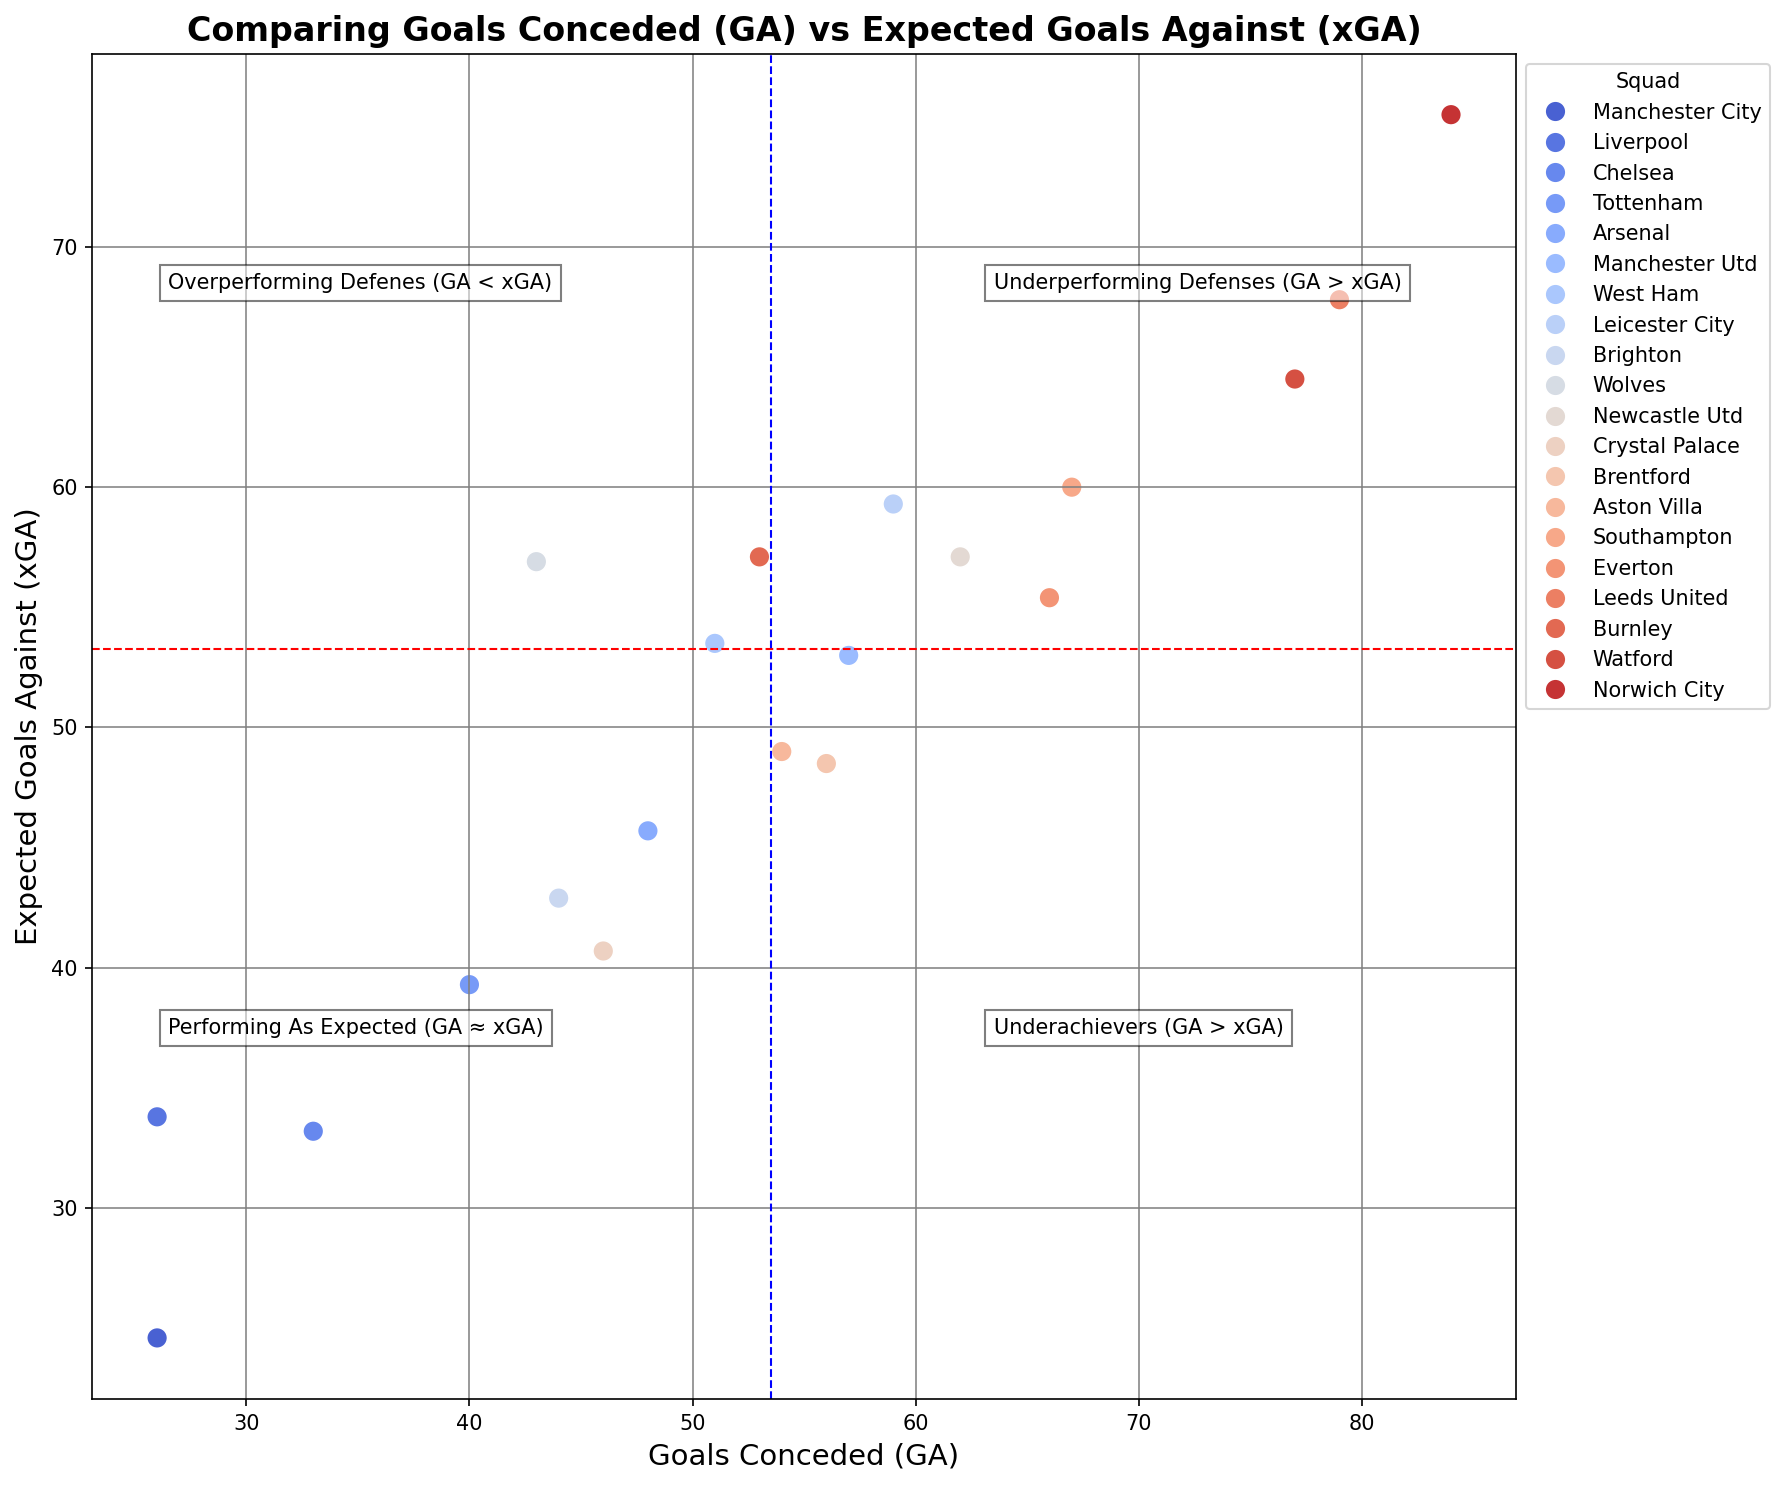

In [76]:
median_GA = overall['GA'].median()
median_xGA = overall['xGA'].median()


plt.figure(figsize=(12,10),dpi=150)
ax = sns.scatterplot(x='GA', y='xGA', data=overall, hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.axhline(y=median_xGA, color='r', linestyle = '--', lw=1)  
plt.axvline(x=median_GA, color='b', linestyle = '--', lw=1)

plt.title('Comparing Goals Conceded (GA) vs Expected Goals Against (xGA)', fontsize=16, fontweight='bold')
plt.xlabel('Goals Conceded (GA)', fontsize=14)
plt.ylabel('Expected Goals Against (xGA)', fontsize=14)


plt.text(median_GA - 27, median_xGA + 15, 'Overperforming Defenes (GA < xGA)', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GA + 10, median_xGA + 15, 'Underperforming Defenses (GA > xGA)', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GA + 10, median_xGA - 16, 'Underachievers (GA > xGA)', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(median_GA - 27, median_xGA - 16, 'Performing As Expected (GA ≈ xGA)', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))


ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.tight_layout()
plt.show()

In [77]:
#Let me double down on it by calculating the ratio of GA/xGA
overall['GA/xGA'] = overall['GA']/overall['xGA']

In [78]:
overall.nlargest(columns='GA/xGA',n=7)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA,GF/xG,GA/xGA
18,Watford,38,6,5,27,34,77,-43,23,0.61,40.0,64.5,-24.5,-0.64,0.620155,0.850000,1.193798
15,Everton,38,11,6,21,43,66,-23,39,1.03,41.2,55.4,-14.2,-0.37,0.743682,1.043689,1.191336
16,Leeds United,38,9,11,18,42,79,-37,38,1.00,44.4,67.8,-23.5,-0.62,0.654867,0.945946,1.165192
12,Brentford,38,13,7,18,48,56,-8,46,1.21,45.8,48.5,-2.7,-0.07,0.944330,1.048035,1.154639
11,Crystal Palace,38,11,15,12,50,46,4,48,1.26,46.4,40.7,5.7,0.15,1.140049,1.077586,1.130221
14,Southampton,38,9,13,16,43,67,-24,40,1.05,44.8,60.0,-15.2,-0.40,0.746667,0.959821,1.116667
19,Norwich City,38,5,7,26,23,84,-61,22,0.58,32.3,75.5,-43.2,-1.14,0.427815,0.712074,1.112583


In [79]:
overall.nsmallest(columns='GA/xGA',n=7)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xG/xGA,GF/xG,GA/xGA
9,Wolves,38,15,6,17,38,43,-5,51,1.34,37.5,56.9,-19.4,-0.51,0.659051,1.013333,0.755712
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,2.624260,1.059752,0.769231
17,Burnley,38,7,14,17,34,53,-19,35,0.92,39.7,57.1,-17.4,-0.46,0.695271,0.856423,0.928196
6,West Ham,38,16,8,14,60,51,9,56,1.47,51.4,53.5,-2.1,-0.06,0.960748,1.167315,0.953271
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1,0.79,1.909639,1.198738,0.993976
7,Leicester City,38,14,10,14,62,59,3,52,1.37,47.8,59.3,-11.5,-0.30,0.806071,1.297071,0.994941
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9,0.58,1.557252,1.127451,1.017812


In [80]:
overall[['Squad','GA','xGA','GA/xGA']]

,Squad,GA,xGA,GA/xGA
0,Manchester City,26,24.6,1.056911
1,Liverpool,26,33.8,0.769231
2,Chelsea,33,33.2,0.993976
3,Tottenham,40,39.3,1.017812
4,Arsenal,48,45.7,1.050328
5,Manchester Utd,57,53.0,1.075472
6,West Ham,51,53.5,0.953271
7,Leicester City,59,59.3,0.994941
8,Brighton,44,42.9,1.025641
9,Wolves,43,56.9,0.755712


3. **Team Defensive Performance: Which teams are the most effective at preventing goals based on xGA vs actual goals conceded?**
 
 **Manchester City conceded the fewest goals and also allowed the least xGA, suggesting they effectively prevented high-quality chances. Despite conceding just 1 more goal than expected, they might have been somewhat unlucky. Their defensive performance was the best, followed by Chelsea, which had the second least xGA and a similar number of goals conceded. Liverpool, while conceding the same number of goals as Manchester City, allowed the third least xGA indicating they might have been fortunate as opponents failed to capitalize on their chances. Tottenham also excelled in this aspect.**
 
 **The weakest defensive team is Norwich City, which reflects their poor league standings. They conceded chances worth over 75.5 xG but actually allowed 84 goals. Watford follows closely, along with Leeds United and Everton.**

*Onto the next question*

*To tackle the chance creation w.r.t progressive passes and progressive carries, I'll need to quantify chance creation itself. As such I have metrics such as non-penalty xG, xA, and open play SCA, that when considered cumulatively, represent the the chance creation the best.*

**Why these metrics? Well, non pen xG shows the quality of shots being taken, open play sca shows the actions that lead to these shots and xA isolates the quality of the pass itself.**

In [81]:
creative_actions.head()

,Squad,SCA,SCA90,OpSCA,GCA,GCA90,OpGCA,GF,xG
0,Arsenal,1030,27.11,923,99,2.61,87,61,60.5
1,Aston Villa,837,22.03,704,93,2.45,81,52,44.0
2,Brentford,739,19.45,600,78,2.05,58,48,45.8
3,Brighton,870,22.89,746,72,1.89,60,42,46.2
4,Burnley,674,17.74,543,60,1.58,47,34,39.7


In [82]:
squad_possession.head()

,Squad,Poss,Att,Succ,Succ%,PrgC,1/3,CPA
0,Arsenal,52.8,590,319,54.1,734,494,223
1,Aston Villa,46.5,587,333,56.7,653,422,166
2,Brentford,44.8,476,262,55.0,450,332,102
3,Brighton,54.4,559,317,56.7,676,519,139
4,Burnley,40.2,479,258,53.9,388,300,84


In [83]:
squad_shooting.head()

,Squad,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh
0,Arsenal,60,581,186,15.29,4.89,0.09,0.30,60.5,55.1,0.10
1,Aston Villa,50,461,159,12.13,4.18,0.10,0.30,44.0,42.0,0.09
2,Brentford,46,436,141,11.47,3.71,0.09,0.28,45.8,41.1,0.10
3,Brighton,40,482,141,12.68,3.71,0.07,0.26,46.2,40.7,0.09
4,Burnley,32,405,119,10.66,3.13,0.08,0.26,39.7,38.1,0.10


In [84]:
squad_passing.head()

,Squad,Cmp,Att,Cmp%,Ast,xA,KP,1/3,PPA,PrgP
0,Arsenal,16176,19843,81.5,41,34.6,437,1354,403,1655
1,Aston Villa,12748,16499,77.3,42,30.0,356,1019,363,1300
2,Brentford,11676,16272,71.8,33,33.8,311,942,343,1189
3,Brighton,16410,20588,79.7,30,31.5,356,1187,414,1547
4,Burnley,9454,14107,67.0,26,28.0,286,877,324,972


In [85]:
#creating a dataframe now that will contain stats only relative to chance creation
chance_creation = creative_actions[['Squad','OpSCA']].merge(squad_shooting[['Squad','npxG']],on='Squad').merge(squad_passing[['Squad','xA']],on='Squad')

In [86]:
chance_creation.head()

,Squad,OpSCA,npxG,xA
0,Arsenal,923,55.1,34.6
1,Aston Villa,704,42.0,30.0
2,Brentford,600,41.1,33.8
3,Brighton,746,40.7,31.5
4,Burnley,543,38.1,28.0


In [87]:
#great now lets create a chance_creation stat which will be the sum of OpSCA, npxG and xA

chance_creation['Chance Creation'] = chance_creation['OpSCA'] + chance_creation['npxG'] + chance_creation['xA']

In [88]:
chance_creation.head()

,Squad,OpSCA,npxG,xA,Chance Creation
0,Arsenal,923,55.1,34.6,1012.7
1,Aston Villa,704,42.0,30.0,776.0
2,Brentford,600,41.1,33.8,674.9
3,Brighton,746,40.7,31.5,818.2
4,Burnley,543,38.1,28.0,609.1


In [89]:
#now we can leverage this stat and compare it to (progressive passes + progressive carries)
chance_creation = chance_creation.merge(squad_passing[['Squad','PrgP']], on='Squad').merge(squad_possession[['Squad','PrgC']], on='Squad')

In [90]:
chance_creation.head()

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC
0,Arsenal,923,55.1,34.6,1012.7,1655,734
1,Aston Villa,704,42.0,30.0,776.0,1300,653
2,Brentford,600,41.1,33.8,674.9,1189,450
3,Brighton,746,40.7,31.5,818.2,1547,676
4,Burnley,543,38.1,28.0,609.1,972,388


In [91]:
chance_creation

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC
0,Arsenal,923,55.1,34.6,1012.7,1655,734
1,Aston Villa,704,42.0,30.0,776.0,1300,653
2,Brentford,600,41.1,33.8,674.9,1189,450
3,Brighton,746,40.7,31.5,818.2,1547,676
4,Burnley,543,38.1,28.0,609.1,972,388
5,Chelsea,953,56.6,42.6,1052.2,1967,894
6,Crystal Palace,605,40.1,30.2,675.3,1229,592
7,Everton,628,35.8,25.1,688.9,1100,512
8,Leeds United,715,40.4,25.1,780.5,1483,671
9,Leicester City,671,46.2,26.9,744.1,1356,622


In [92]:
chance_creation['Prg(P+C)'] = chance_creation['PrgC'] + chance_creation['PrgP']

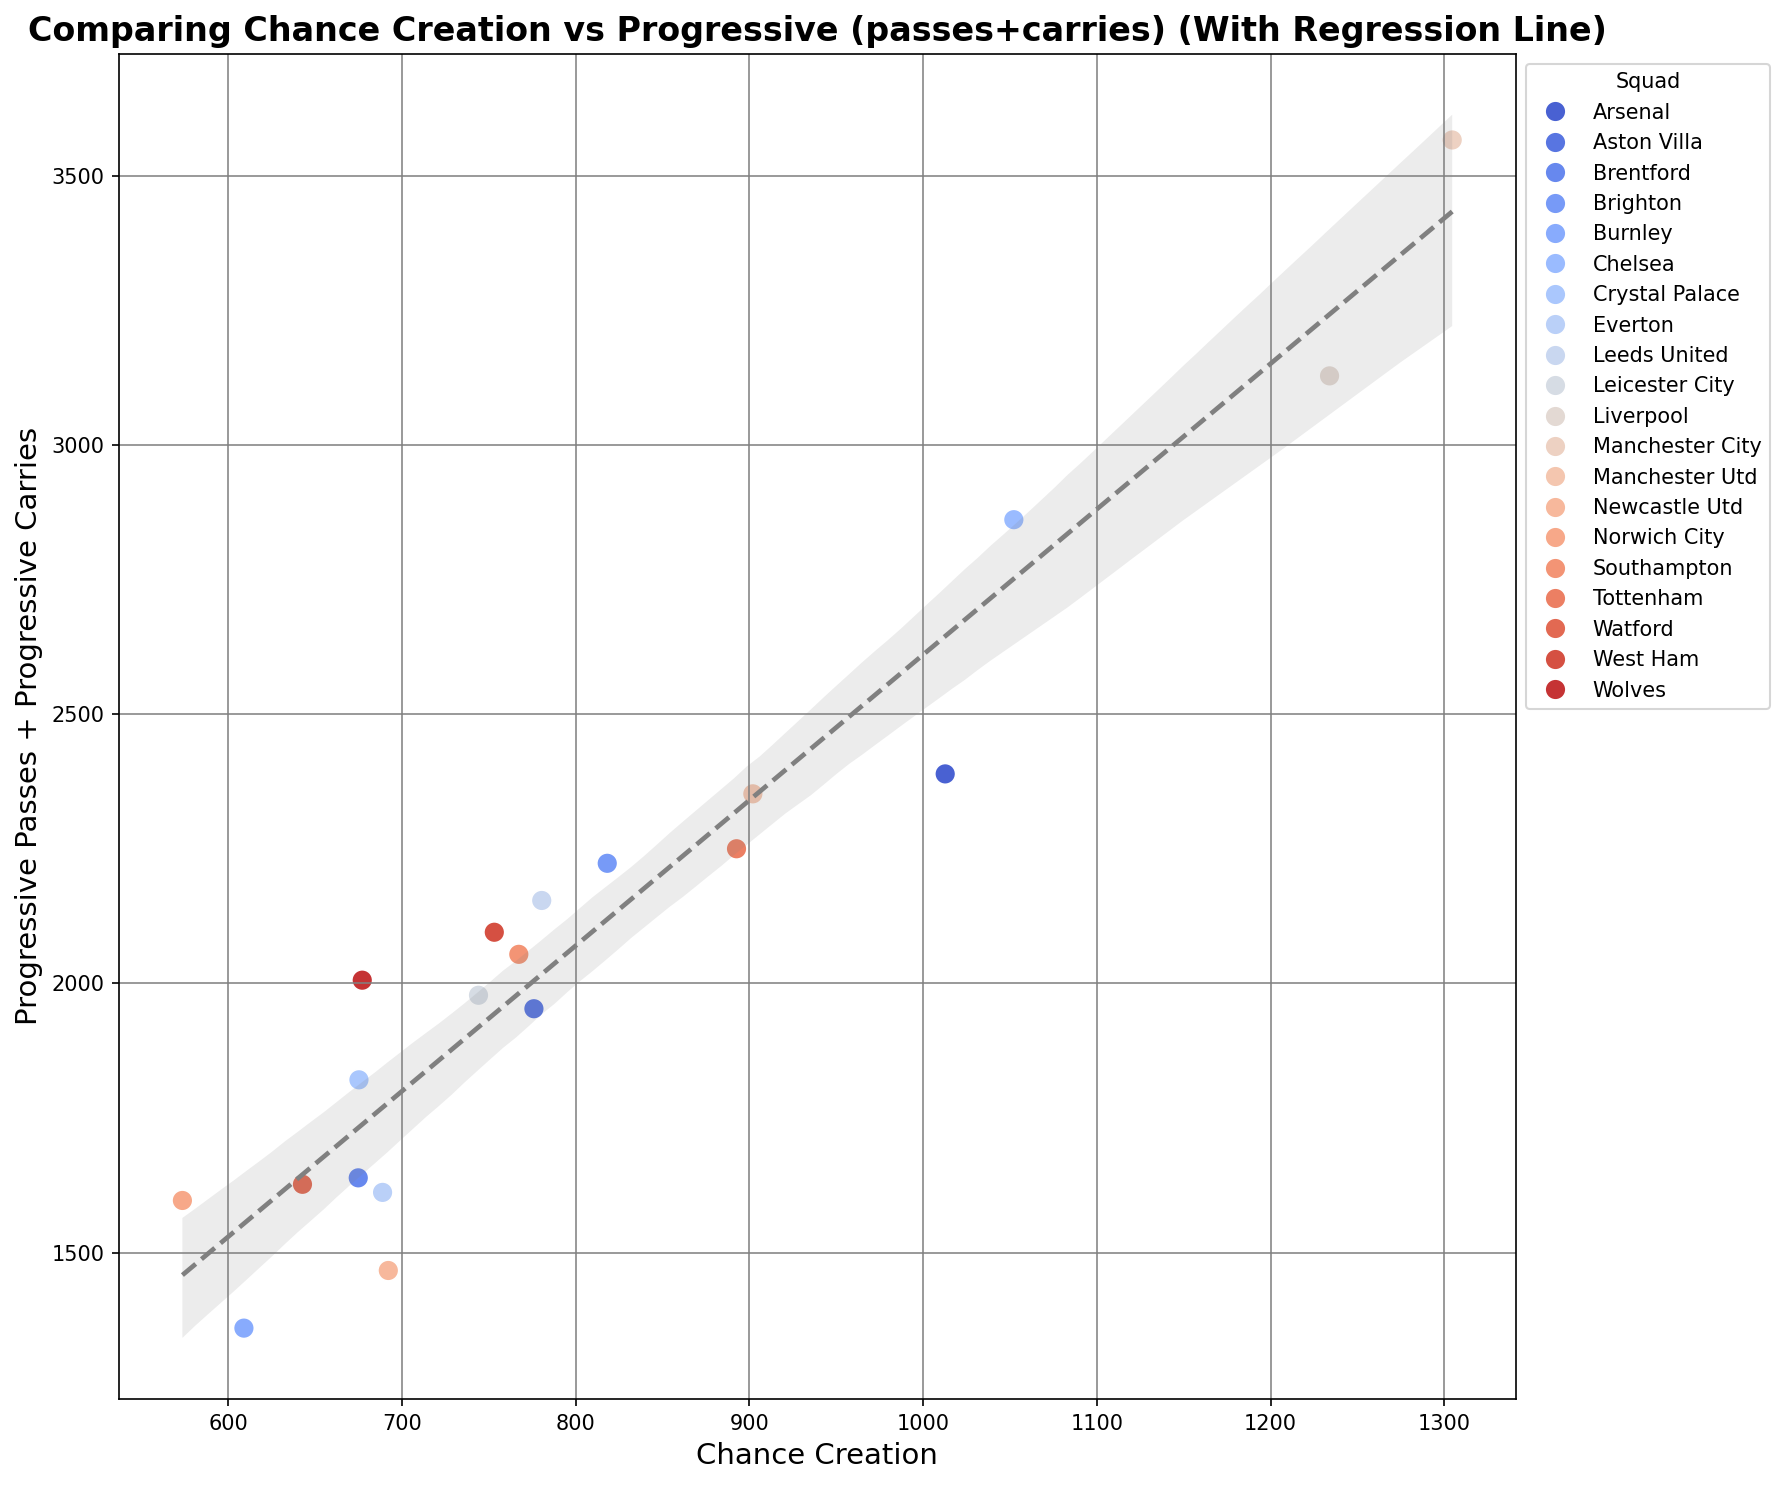

In [93]:
#Here the data seems to be highly skewed so division of quadrants based on median is not ideal as the median will be close to where chunk of the data is clustered
plt.figure(figsize=(12,10),dpi=150)
ax = sns.scatterplot(x='Chance Creation', y='Prg(P+C)', data=chance_creation, hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.regplot(x='Chance Creation', y='Prg(P+C)', data=chance_creation, scatter=False, color='gray', line_kws={"linestyle": "dashed"}, ax=ax)

plt.title('Comparing Chance Creation vs Progressive (passes+carries) (With Regression Line)', fontsize=16, fontweight='bold')
plt.xlabel('Chance Creation', fontsize=14)
plt.ylabel('Progressive Passes + Progressive Carries', fontsize=14)


ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.tight_layout()
plt.show()

In [94]:
#lets double down on this by creating Efficiency1 = CC/PPC

chance_creation['Efficiency1'] = chance_creation['Chance Creation']/chance_creation['Prg(P+C)']

In [95]:
chance_creation.head()

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC,Prg(P+C),Efficiency1
0,Arsenal,923,55.1,34.6,1012.7,1655,734,2389,0.423901
1,Aston Villa,704,42.0,30.0,776.0,1300,653,1953,0.397337
2,Brentford,600,41.1,33.8,674.9,1189,450,1639,0.411775
3,Brighton,746,40.7,31.5,818.2,1547,676,2223,0.368061
4,Burnley,543,38.1,28.0,609.1,972,388,1360,0.447868


In [96]:
chance_creation.sort_values(by='Efficiency1', ascending=False)

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC,Prg(P+C),Efficiency1
13,Newcastle Utd,633,35.9,23.3,692.2,923,544,1467,0.471847
4,Burnley,543,38.1,28.0,609.1,972,388,1360,0.447868
7,Everton,628,35.8,25.1,688.9,1100,512,1612,0.427357
0,Arsenal,923,55.1,34.6,1012.7,1655,734,2389,0.423901
2,Brentford,600,41.1,33.8,674.9,1189,450,1639,0.411775
1,Aston Villa,704,42.0,30.0,776.0,1300,653,1953,0.397337
16,Tottenham,794,57.3,41.3,892.6,1459,791,2250,0.396711
17,Watford,582,38.4,22.4,642.8,1070,557,1627,0.395083
10,Liverpool,1095,82.7,56.2,1233.9,2243,885,3128,0.394469
12,Manchester Utd,813,51.9,37.1,902.0,1568,784,2352,0.383503


In [97]:
chance_creation.nsmallest(columns='Efficiency1',n=10)

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC,Prg(P+C),Efficiency1
19,Wolves,617,36.8,23.4,677.2,1283,723,2006,0.337587
14,Norwich City,520,30.0,23.7,573.7,1031,566,1597,0.359236
18,West Ham,674,46.8,32.4,753.2,1449,646,2095,0.359523
8,Leeds United,715,40.4,25.1,780.5,1483,671,2154,0.362349
11,Manchester City,1166,81.4,57.1,1304.5,2421,1145,3566,0.365816
5,Chelsea,953,56.6,42.6,1052.2,1967,894,2861,0.367774
3,Brighton,746,40.7,31.5,818.2,1547,676,2223,0.368061
6,Crystal Palace,605,40.1,30.2,675.3,1229,592,1821,0.370840
15,Southampton,697,41.6,28.7,767.3,1326,728,2054,0.373564
9,Leicester City,671,46.2,26.9,744.1,1356,622,1978,0.376188


4. **Ball Progression and Chance Creation: Which teams are most effective at creating chances through progressive passes and progressive carries?**
  
  **Manchester City and Liverpool create the highest quality chances. However, it’s unlikely that they rely solely on progressive actions to achieve this, as it takes them many progressive actions relative to the quality of chances they generate. This could suggest that teams defending against them are compact and deep, making it harder to penetrate defenses. Therefore, City and Liverpool might need to rely on a higher volume of actions.**

  **Newcastle United and Burnley, on the other hand, generate quality chances relative to their progressive actions. This could imply that they defend deeper and capitalize on counter-attacks or transitions. Their relatively low number of chances created per ninety minutes supports this theory.**

  **As the trend has continued, Norwich City neither create many quality chances nor make a significant number of progressive actions.**

In [98]:
defenses.head()

,Squad,Tkl,TklW,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,GA,xGA
0,Arsenal,540,311,386,123,263,296,836,658,20,48,45.7
1,Aston Villa,634,382,453,140,313,339,973,693,13,54,49.0
2,Brentford,607,342,383,113,270,393,1000,863,7,56,48.5
3,Brighton,668,403,480,150,330,358,1026,723,12,44,42.9
4,Burnley,590,324,509,211,298,410,1000,887,18,53,57.1


*Now lets create a column called defensive actions and as is natural I will only include Tackles that are won in order to correlate it to goals conceded, because tackles won will have a stronger correlation to fewer goals conceded, likewise, interceptions, blocks, and clearances will inhibit the same behavior. However, this alone will not suffice since conceding fewer goals could also relate to higher possession, compact shape, effective counter pressing and fewer concession of quality chances. I do not have any pressing or formation statistics on me but I do have the other statistics on me. So, here I'll use pair plots to analyse the total relationship between defensive actions and goals conceded putting aside the contribution of higher possession or low xGA.*

In [99]:
defenses.drop(columns=['Tkl','Sh','Pass','Tkl+Int','Err'],inplace=True)

In [100]:
defenses.head()

,Squad,TklW,Blocks,Int,Clr,GA,xGA
0,Arsenal,311,386,296,658,48,45.7
1,Aston Villa,382,453,339,693,54,49.0
2,Brentford,342,383,393,863,56,48.5
3,Brighton,403,480,358,723,44,42.9
4,Burnley,324,509,410,887,53,57.1


In [101]:
defenses['DefAct'] = defenses['TklW'] + defenses['Blocks'] + defenses['Int'] + defenses['Clr']

In [102]:
defenses.head()

,Squad,TklW,Blocks,Int,Clr,GA,xGA,DefAct
0,Arsenal,311,386,296,658,48,45.7,1651
1,Aston Villa,382,453,339,693,54,49.0,1867
2,Brentford,342,383,393,863,56,48.5,1981
3,Brighton,403,480,358,723,44,42.9,1964
4,Burnley,324,509,410,887,53,57.1,2130


In [103]:
defenses = defenses.merge(squad_possession[['Squad','Poss']],on='Squad')

In [104]:
defenses.head()

,Squad,TklW,Blocks,Int,Clr,GA,xGA,DefAct,Poss
0,Arsenal,311,386,296,658,48,45.7,1651,52.8
1,Aston Villa,382,453,339,693,54,49.0,1867,46.5
2,Brentford,342,383,393,863,56,48.5,1981,44.8
3,Brighton,403,480,358,723,44,42.9,1964,54.4
4,Burnley,324,509,410,887,53,57.1,2130,40.2


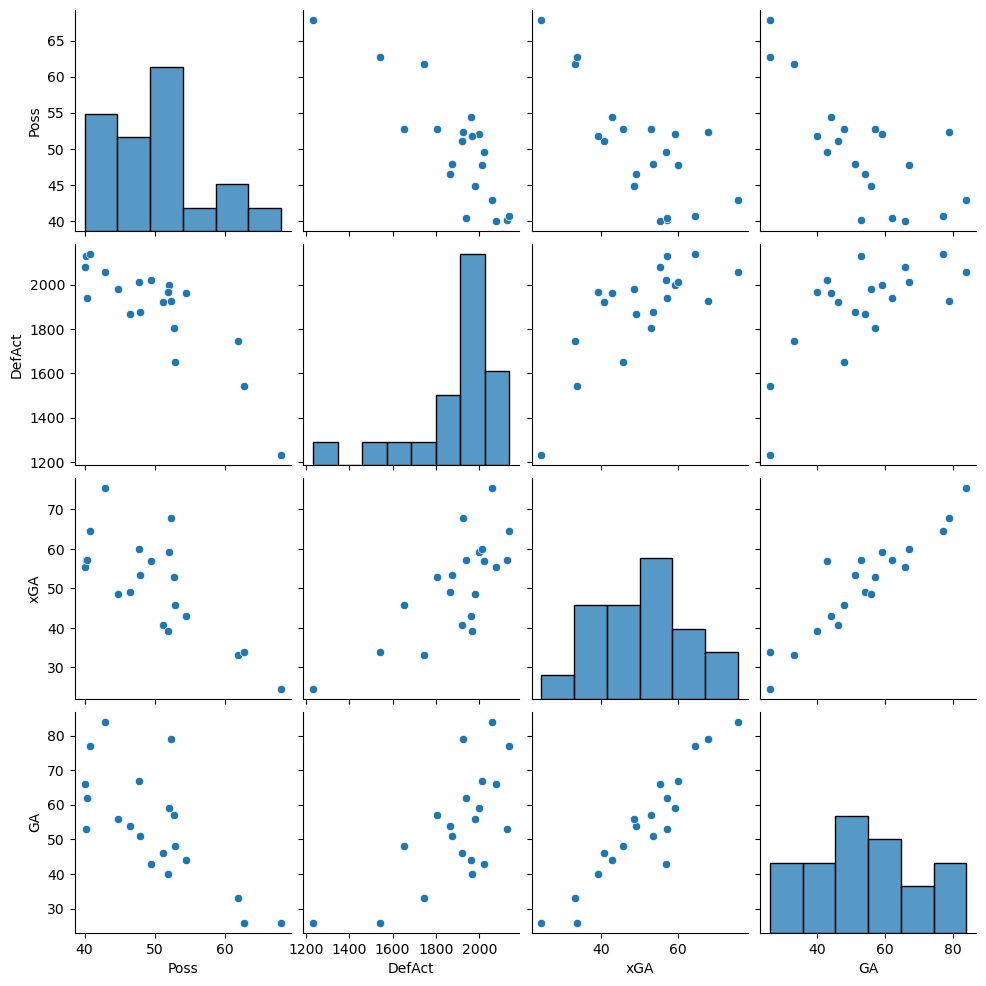

In [105]:
sns.pairplot(defenses[['Poss','DefAct','xGA','GA']])
plt.show()

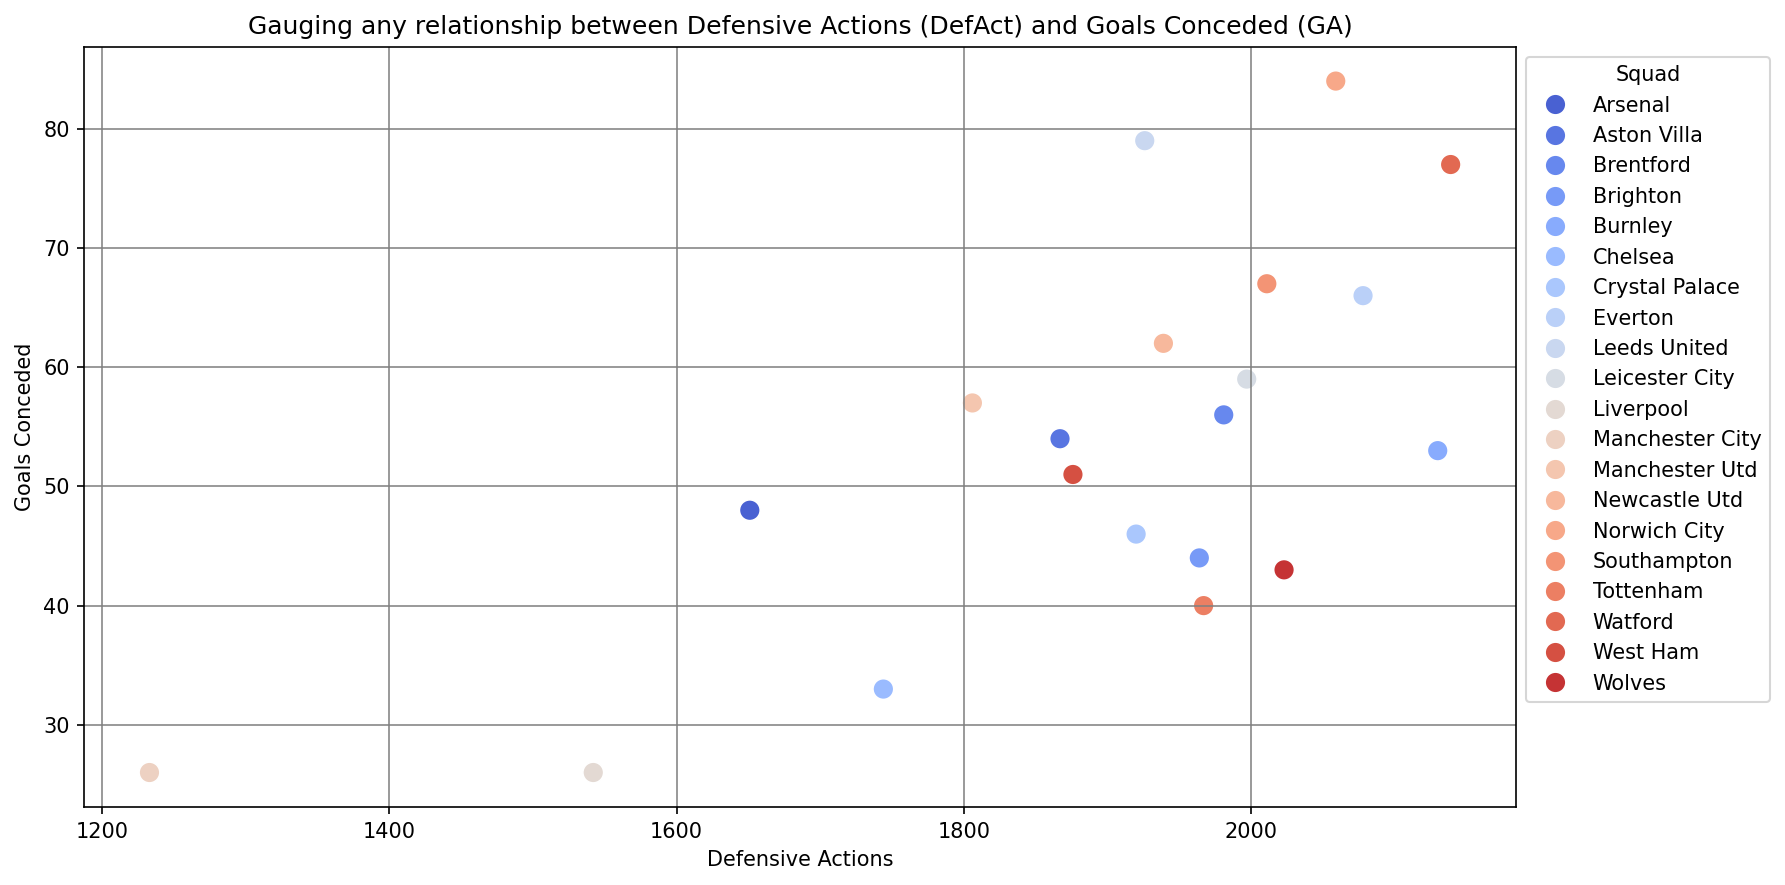

In [106]:
plt.figure(figsize=(12,6),dpi=150)
ax = sns.scatterplot(x='DefAct',y='GA',data=defenses,hue='Squad',palette='coolwarm',s=100,edgecolor='w')
sns.move_legend(ax,'upper left',bbox_to_anchor=(1,1))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.title('Gauging any relationship between Defensive Actions (DefAct) and Goals Conceded (GA)')
plt.xlabel('Defensive Actions')
plt.ylabel('Goals Conceded')
plt.tight_layout()

plt.show()

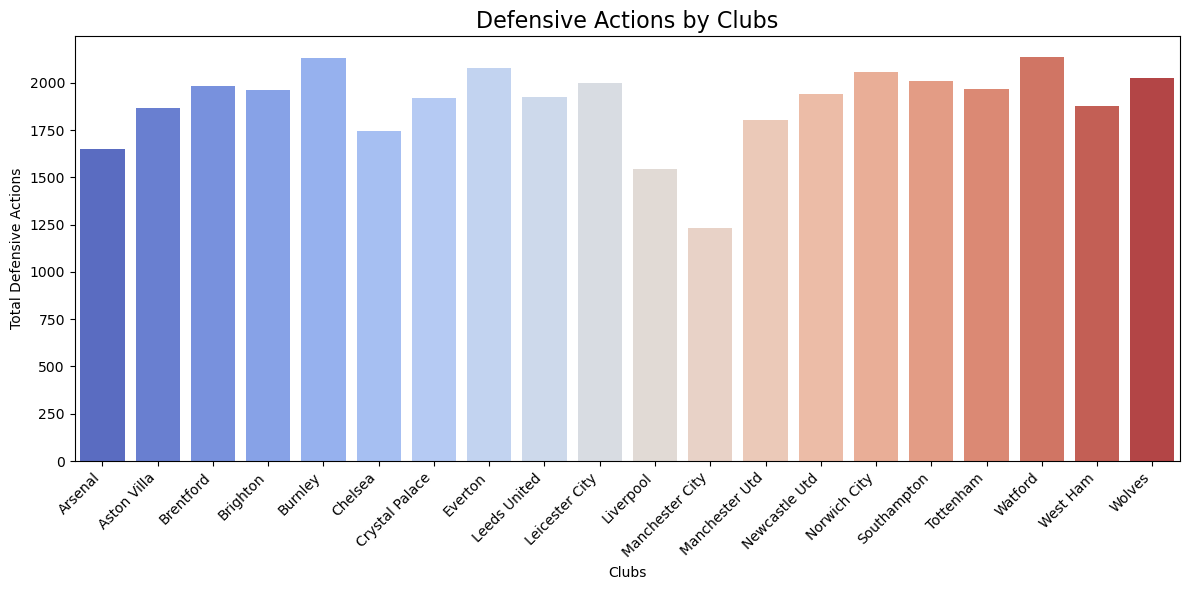

In [107]:
plt.figure(figsize=(12, 6))

plot = sns.barplot(x='Squad', y='DefAct',hue='Squad', data=defenses, palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.title('Defensive Actions by Clubs', fontsize=16)
plt.xlabel('Clubs')
plt.ylabel('Total Defensive Actions')

plt.tight_layout()
plt.show()


In [108]:
defenses[['DefAct','xGA','Poss','GA']].select_dtypes(exclude='object').corr()

,DefAct,xGA,Poss,GA
DefAct,1.000000,0.743059,-0.843998,0.679277
xGA,0.743059,1.000000,-0.751405,0.928097
Poss,-0.843998,-0.751405,1.000000,-0.738555
GA,0.679277,0.928097,-0.738555,1.000000


In [109]:
defenses[['Squad','DefAct','GA']]

,Squad,DefAct,GA
0,Arsenal,1651,48
1,Aston Villa,1867,54
2,Brentford,1981,56
3,Brighton,1964,44
4,Burnley,2130,53
5,Chelsea,1744,33
6,Crystal Palace,1920,46
7,Everton,2078,66
8,Leeds United,1926,79
9,Leicester City,1997,59


*So far, it remains unclear whether I can isolate the contribution of defensive actions to goals conceded, as teams like Manchester City and Liverpool make the fewest defensive actions yet still concede the least number of goals. This aligns with my earlier deduction that the sheer number of defensive actions alone cannot explain their impact on goals conceded. As previously deduced, expected goals against (xGA) provides a better correlation to goals conceded, and teams that retain possession more tend to defend less. Additionally, factors like pressing and formation play a significant role.*

*Although I don't have data on pressing or formations at the moment, I cannot gauge the contribution of defensive actions by using a linear regression model, as the sample size is about 20 clubs. So, I'll report based on context.*

5. **Defensive Actions vs Goals Conceded: Which teams' defensive metrics are most strongly correlated with fewer goals conceded?**

 **Based on the pair plot, scatter plot, and correlation matrix of the defense dataframe, which includes metrics like DefAct (tackles won + interceptions + clearances + blocks), Poss (Possession), GA (Goals Conceded), and xGA (Expected Goals Against), xGA emerges as the most reliable metric for predicting or gauging GA for a club. This observation aligns with earlier findings comparing teams' xGA vs. GA.**

 **Teams with higher possession tend to engage in fewer defensive actions and consequently concede fewer goals. Although pressing and defensive shape are also crucial factors, I lack data on these aspects. My findings suggest that defensive actions alone are insufficient for predicting goals conceded.**

 **Among the teams, Manchester City and Liverpool stand out with their defensive metrics showing a strong correlation with fewer goals conceded. This indicates that these teams usually have extended periods of controlled possession, resulting in fewer defensive actions and limiting high-scoring chances against them.**

 **On the other end, Norwich City, Leeds United, and Watford are notable for engaging in numerous defensive actions but still concede the most goals. This suggests that these teams struggle to maintain controlled possession and are more susceptible to high-quality chances against them.**`

In [110]:
#now lets start with the goalkeeping analysism
goalkeeping.head()

,Squad,GA,GA90,SoTA,Saves,Save%,CS,CS%,PSxG,PSxG/SoT,PSxG+/-,/90,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Arsenal,48,1.26,147,100,70.7,13,34.2,47.6,0.29,0.6,0.02,487,32,6.6,61,1.61,7.3
1,Aston Villa,54,1.42,149,96,66.4,11,28.9,46.5,0.29,-5.5,-0.14,513,40,7.8,34,0.89,15.4
2,Brentford,56,1.47,179,125,71.5,9,23.7,49.4,0.25,-4.6,-0.12,626,37,5.9,58,1.53,15.8
3,Brighton,44,1.16,146,102,71.9,11,28.9,42.5,0.28,-1.5,-0.04,535,60,11.2,36,0.95,9.3
4,Burnley,53,1.39,178,127,73.0,9,23.7,47.5,0.25,-3.5,-0.09,642,46,7.2,84,2.21,17.0


In [111]:
goalkeeping[['/90','Stp%','GA']].corr()

,/90,Stp%,GA
/90,1.000000,0.275410,-0.805049
Stp%,0.275410,1.000000,-0.462903
GA,-0.805049,-0.462903,1.000000


In [112]:
stopping = goalkeeping[['Squad','/90','Stp%','GA']]

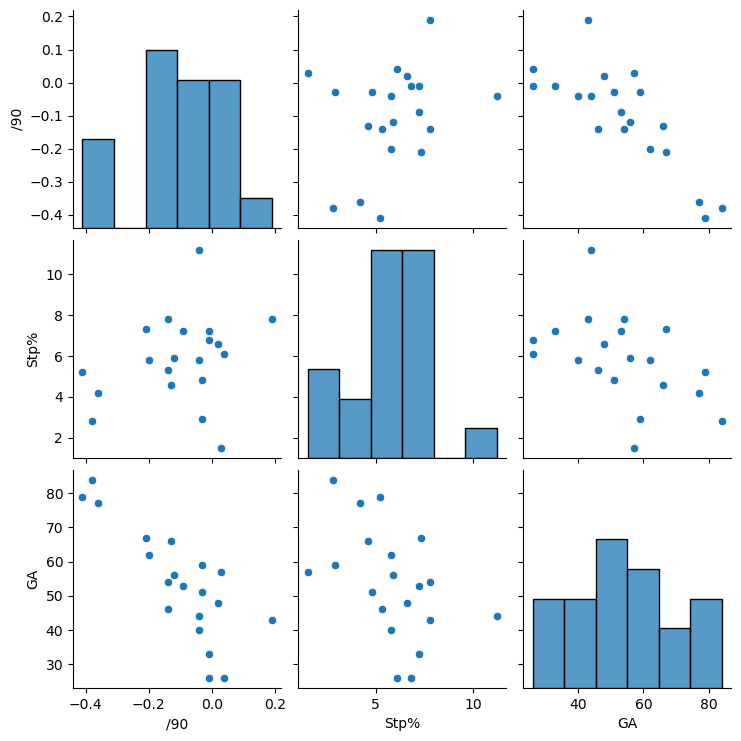

In [113]:
sns.pairplot(stopping)
plt.show()

*It seems that the correlation between Post-Shot Expected Goals minus Goals Against per 90 (PSxG - GA/90) and goals conceded is extremely negative. This means that a higher PSxG - GA/90 is associated with fewer goals conceded per 90 minutes. If a goalkeeper has a positive PSxG - GA/90, it indicates that they are saving shots that were statistically expected to be goals, showcasing their impact based solely on their ability.*
*Additionally, the correlation between Cross Stopped % and goals conceded is moderately negative. This implies that a higher percentage of crosses claimed by the goalkeeper can help reduce the threat of facing high-quality shots on target.* 

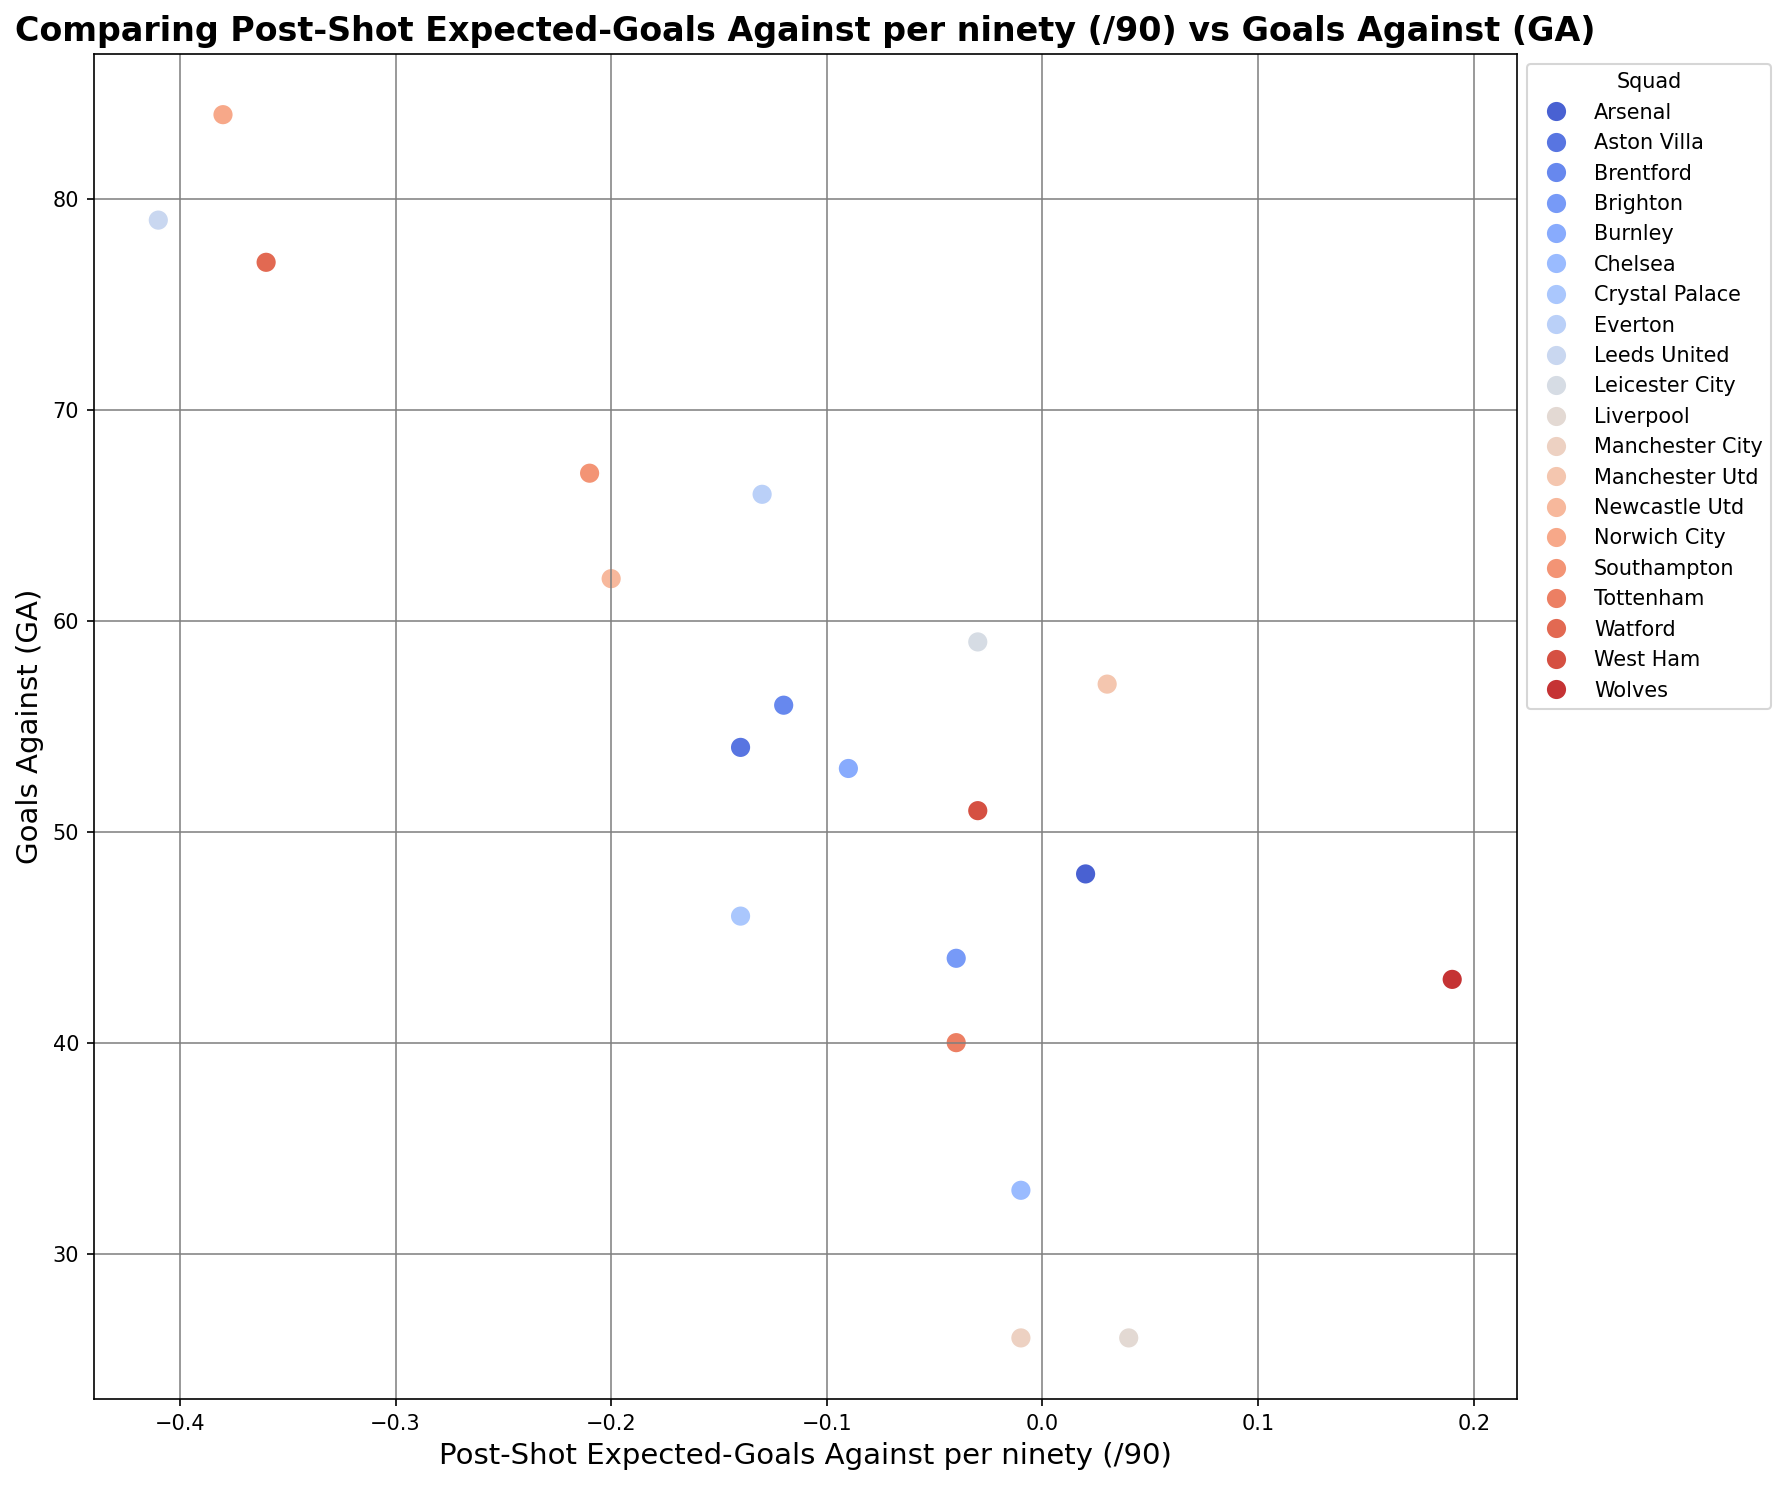

In [114]:
plt.figure(figsize=(12,10),dpi=150)
ax = sns.scatterplot(x='/90', y='GA', data=stopping, hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title('Comparing Post-Shot Expected-Goals Against per ninety (/90) vs Goals Against (GA)', fontsize=16, fontweight='bold')
plt.xlabel('Post-Shot Expected-Goals Against per ninety (/90)', fontsize=14)
plt.ylabel('Goals Against (GA)', fontsize=14)

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.tight_layout()
plt.show()

In [115]:
# to double down on this
stopping.sort_values(by='/90', ascending=False)

,Squad,/90,Stp%,GA
19,Wolves,0.19,7.8,43
10,Liverpool,0.04,6.1,26
12,Manchester Utd,0.03,1.5,57
0,Arsenal,0.02,6.6,48
5,Chelsea,-0.01,7.2,33
11,Manchester City,-0.01,6.8,26
9,Leicester City,-0.03,2.9,59
18,West Ham,-0.03,4.8,51
3,Brighton,-0.04,11.2,44
16,Tottenham,-0.04,5.8,40


6. **Goalkeeper Performance Impact: How do teams' goalkeepers affect their defensive performance based on psxg vs actual goals conceded?**
 
 **From the sorted dataframe, pairplot, and scatterplot of PSxG - GA/90 vs. goals conceded, it is evident that teams with higher Post-Shot Expected Goals minus Goals Against per ninety (PSxG - GA/90) tend to concede fewer goals per season. This supports the idea that goalkeepers who consistently stop higher-quality shots contribute to their teams conceding fewer goals overall. For example:**

 **Liverpool: They were expected to concede around 33 goals based on their xGA but only conceded 26. This demonstrates their goalkeeper’s ability to save shots beyond what was statistically expected.**

 **Wolves: They provide an even more striking example, conceding only 43 goals compared to an expected 57 goals. This significant difference highlights the substantial positive impact of their goalkeeper on their defensive performance.**

 **Conversely, Manchester City: Despite conceding the least xGA, they ended up conceding one more goal than expected. This suggests a slight underperformance from their goalkeeper compared to the expectations set by their xGA.**

*Now, to the last questing at hand about shooting efficiency.*

In [116]:
squad_shooting.head()

,Squad,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh
0,Arsenal,60,581,186,15.29,4.89,0.09,0.30,60.5,55.1,0.10
1,Aston Villa,50,461,159,12.13,4.18,0.10,0.30,44.0,42.0,0.09
2,Brentford,46,436,141,11.47,3.71,0.09,0.28,45.8,41.1,0.10
3,Brighton,40,482,141,12.68,3.71,0.07,0.26,46.2,40.7,0.09
4,Burnley,32,405,119,10.66,3.13,0.08,0.26,39.7,38.1,0.10


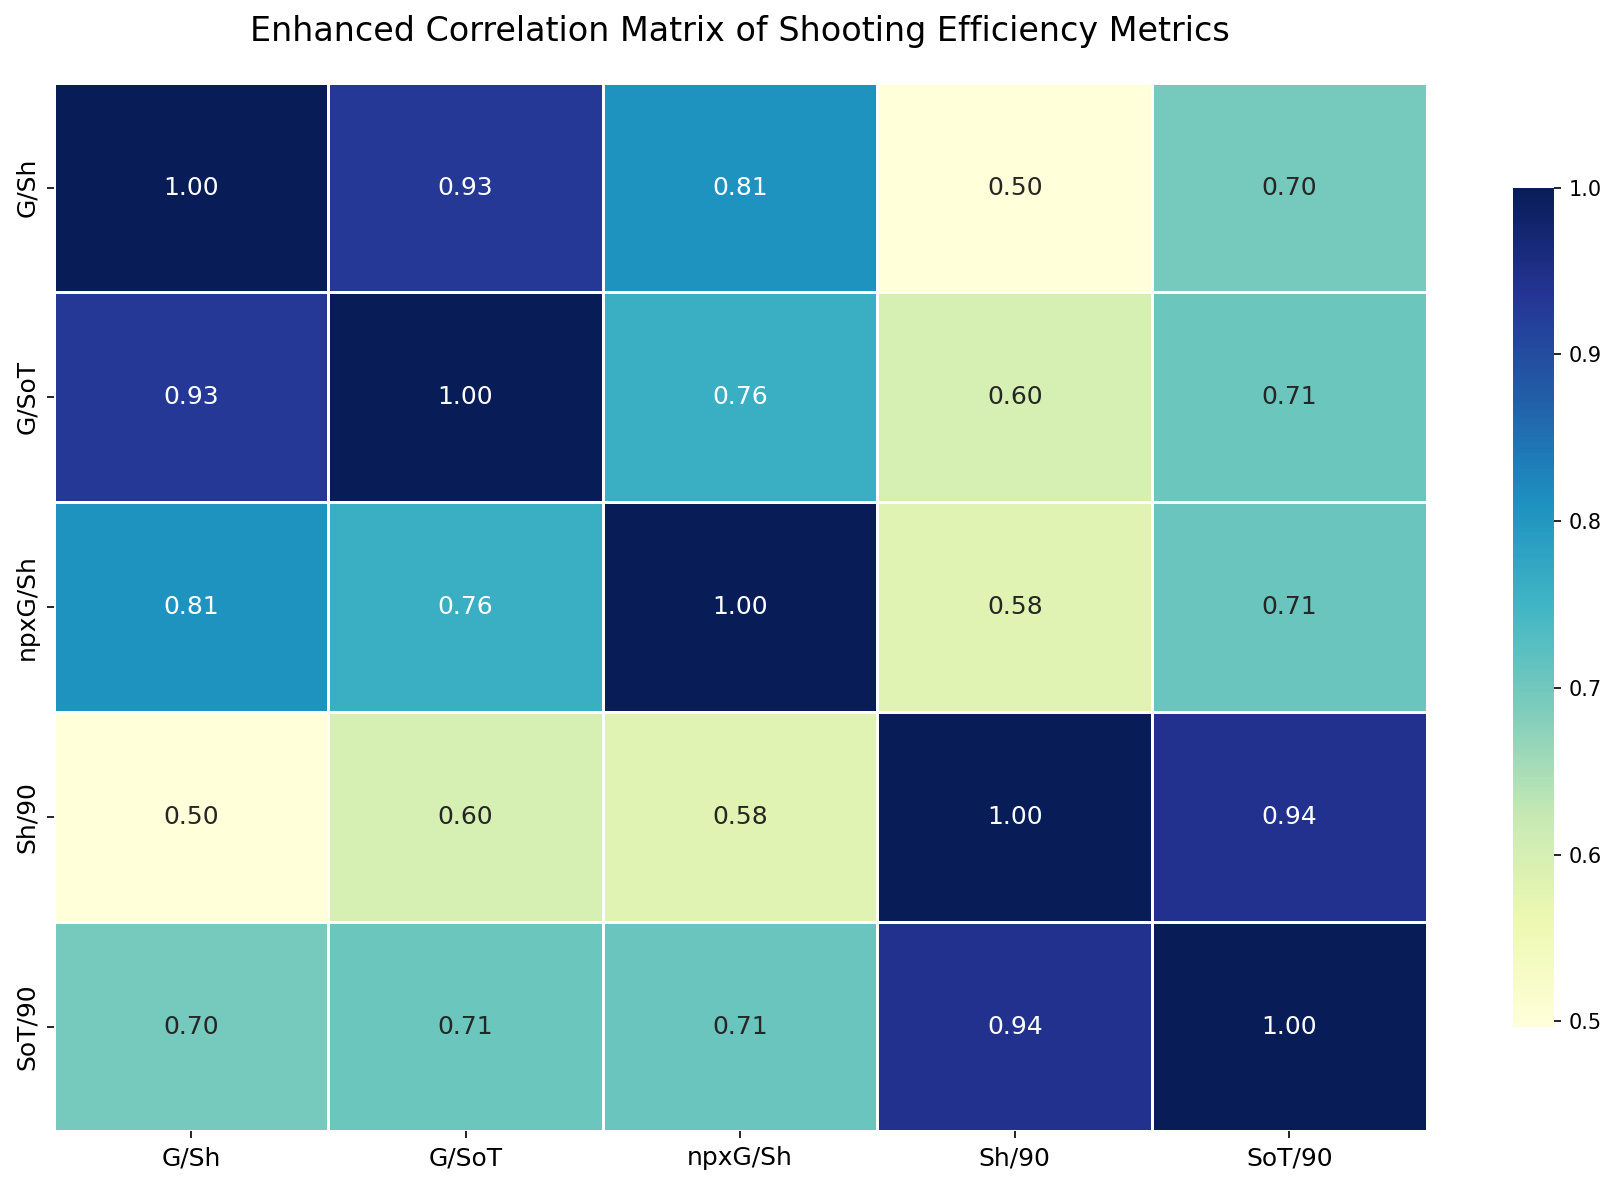

In [117]:
corr_matrix = squad_shooting[['G/Sh', 'G/SoT', 'npxG/Sh', 'Sh/90', 'SoT/90']].corr()

plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', annot_kws={"size": 12}, fmt=".2f", 
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8, 'orientation': 'vertical'})

plt.title('Enhanced Correlation Matrix of Shooting Efficiency Metrics', fontsize=16, pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

*Based off this correlation heatmap it seems that the metrics that are closely connected to judging the efficiency of the shots to goals conversion are npxG/sh, G/SoT and G/Sh, Whilst other metrics like SoT/90 and Sh/90 are rather more useful in finding the quantity of the shots/shots on targets by a club in 90 minutes.*


I'll now do Scatterplots between Qualitative metrics and efficiency metrics as well as a Scatterplot between Quantitive metrics.

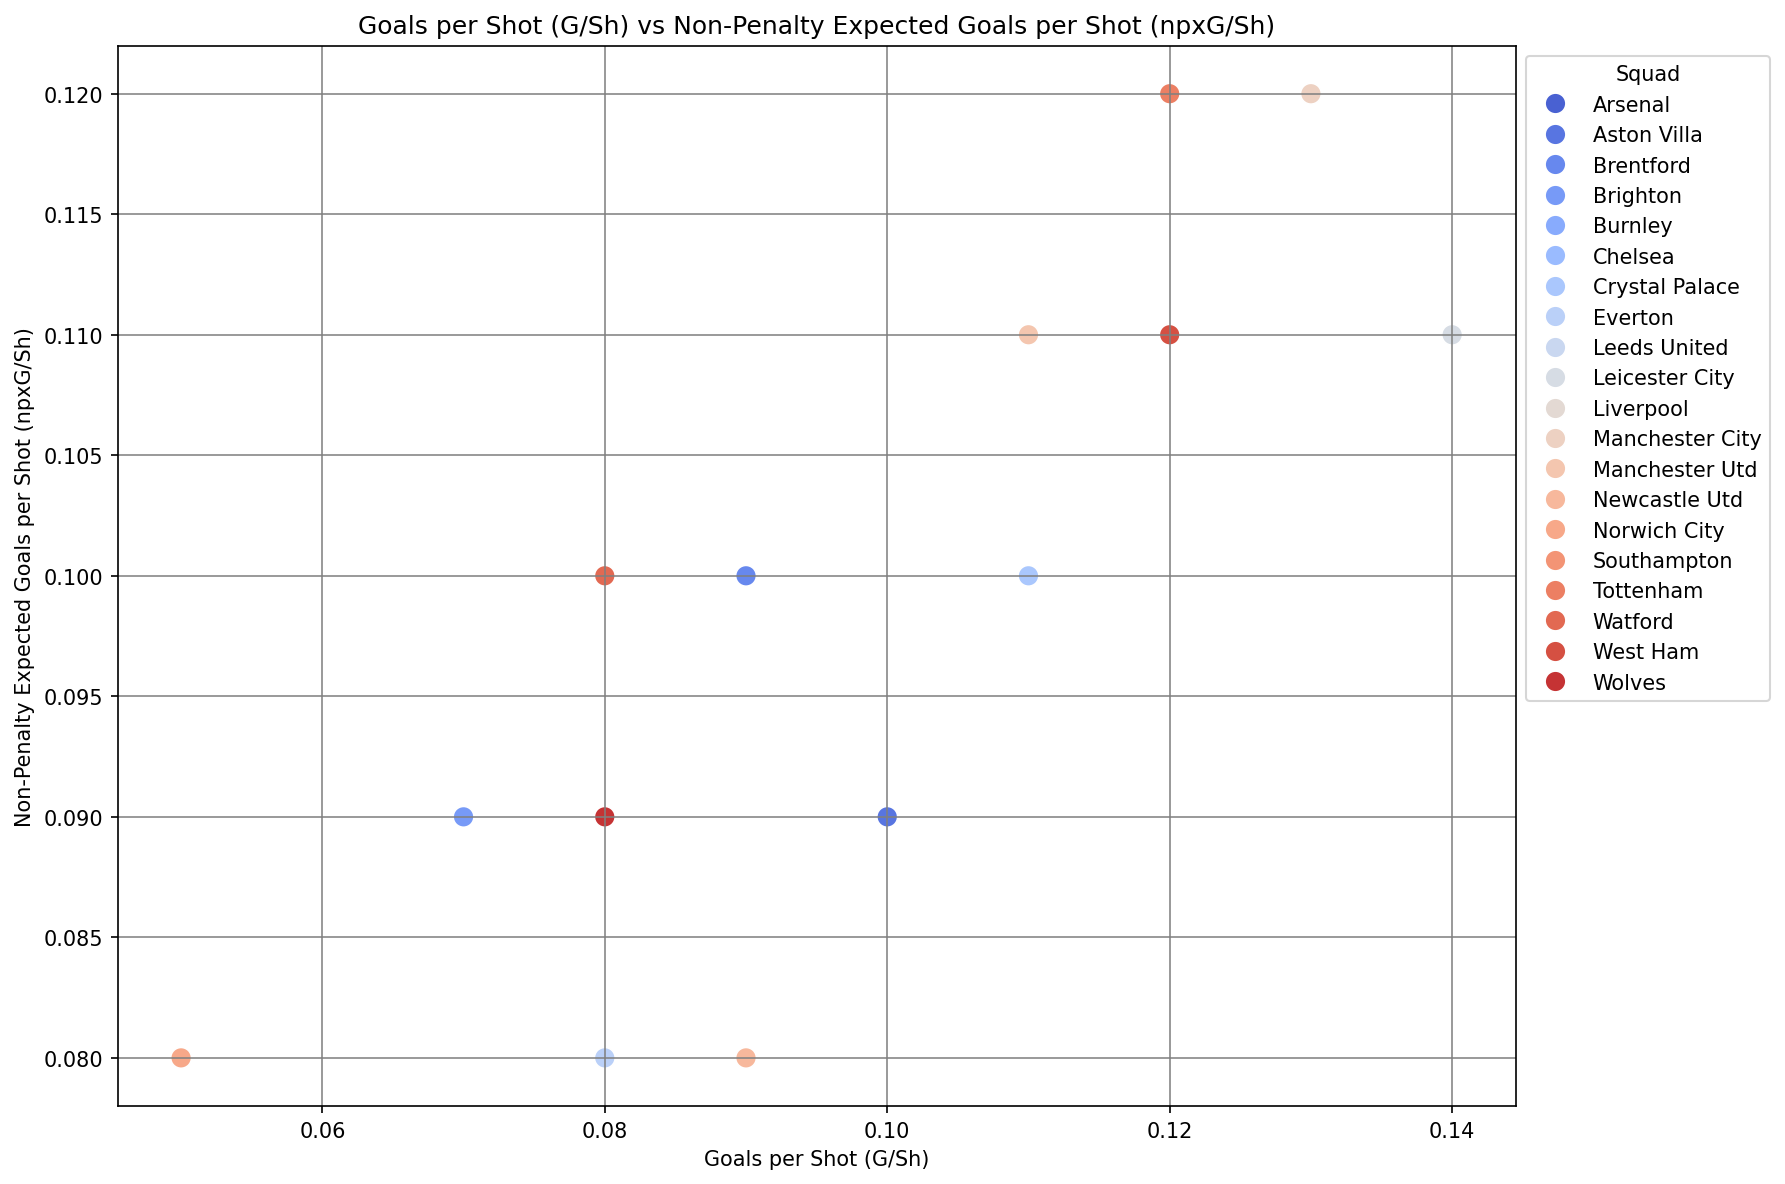

In [118]:
plt.figure(figsize=(12,8),dpi=150)

ax = sns.scatterplot(data=squad_shooting, x='G/Sh', y='npxG/Sh', hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax,'upper left', bbox_to_anchor=(1,1))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.title('Goals per Shot (G/Sh) vs Non-Penalty Expected Goals per Shot (npxG/Sh)')
plt.xlabel('Goals per Shot (G/Sh)')
plt.ylabel('Non-Penalty Expected Goals per Shot (npxG/Sh)')

plt.tight_layout()
plt.show()

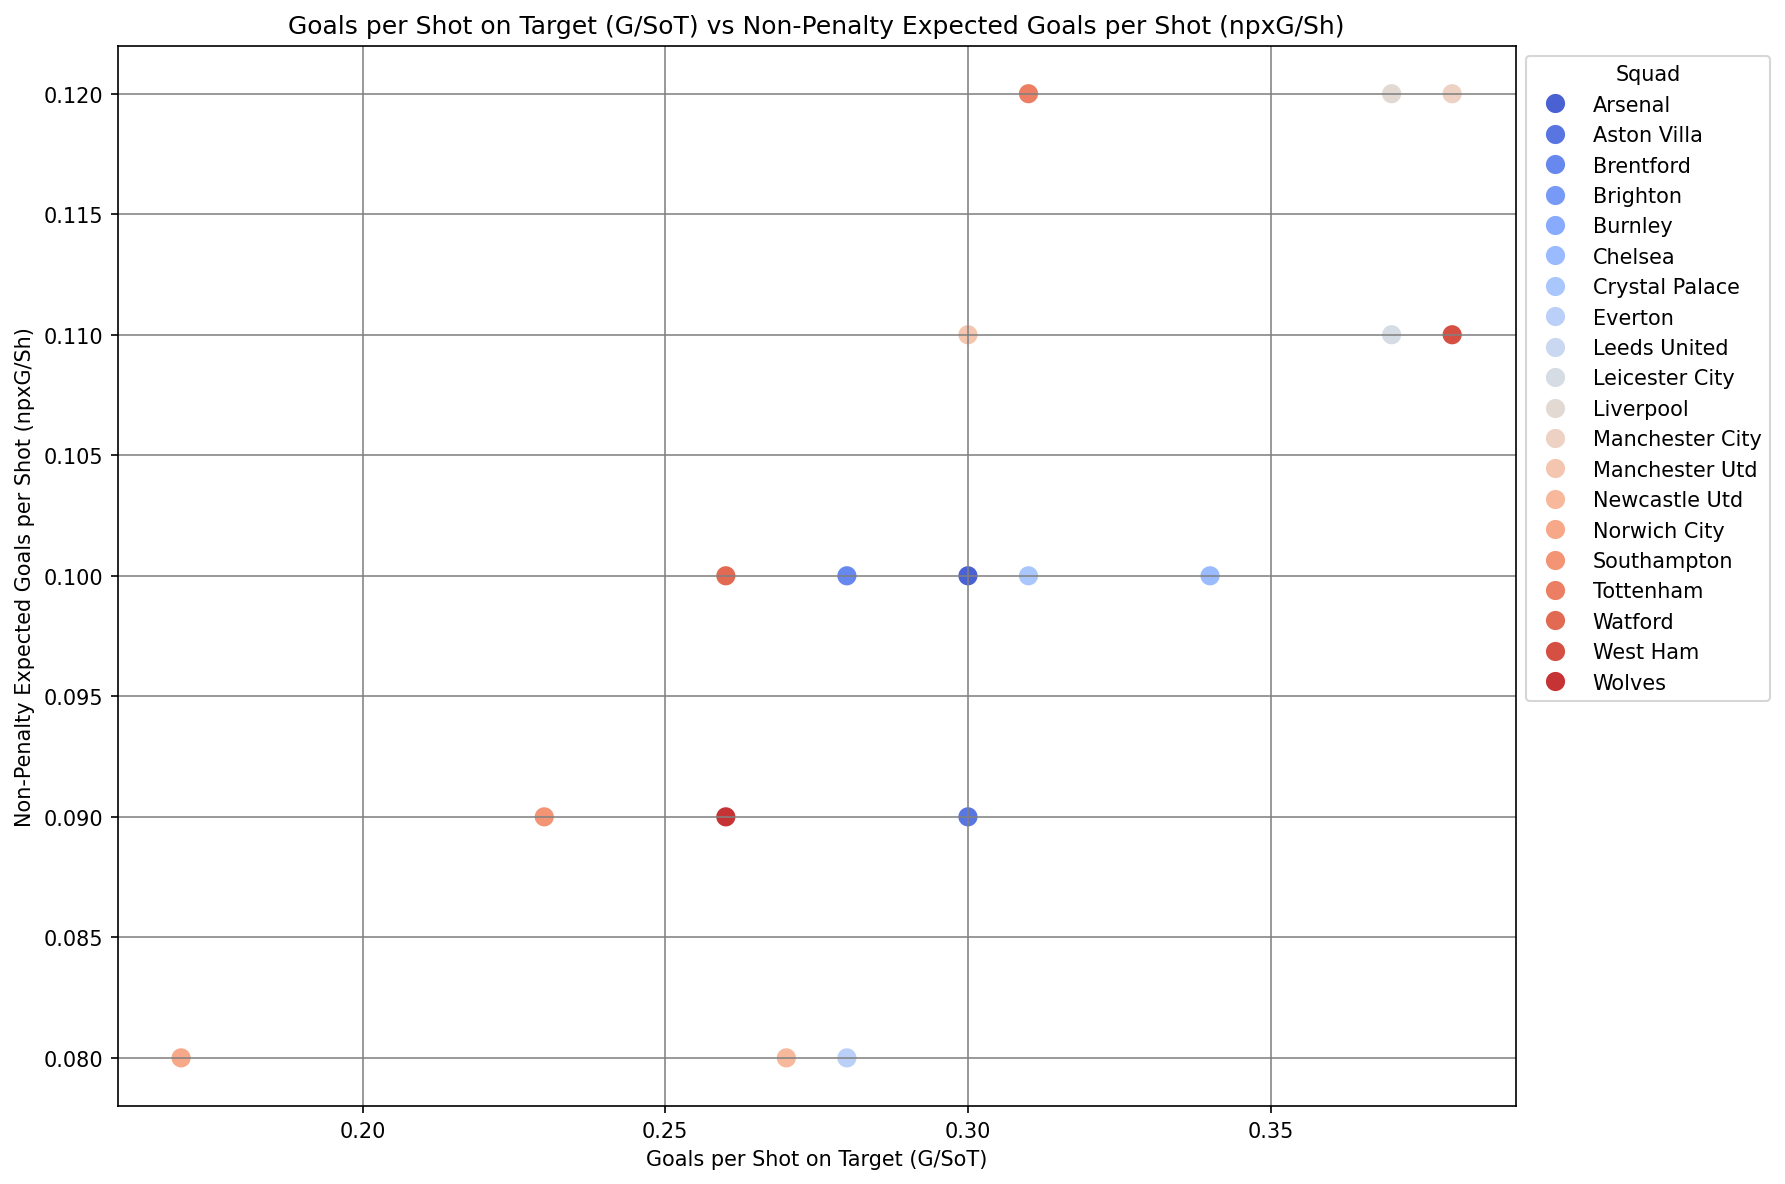

In [119]:
plt.figure(figsize=(12,8),dpi=150)

ax = sns.scatterplot(data=squad_shooting, x='G/SoT', y='npxG/Sh' ,hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax,'upper left', bbox_to_anchor=(1,1))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.title('Goals per Shot on Target (G/SoT) vs Non-Penalty Expected Goals per Shot (npxG/Sh)')
plt.xlabel('Goals per Shot on Target (G/SoT)')
plt.ylabel('Non-Penalty Expected Goals per Shot (npxG/Sh)')

plt.tight_layout()
plt.show()

In [120]:
#converting goals to per ninety to compare against shots per ninety
squad_shooting['G/90'] = round((squad_shooting['Gls']/38),2)

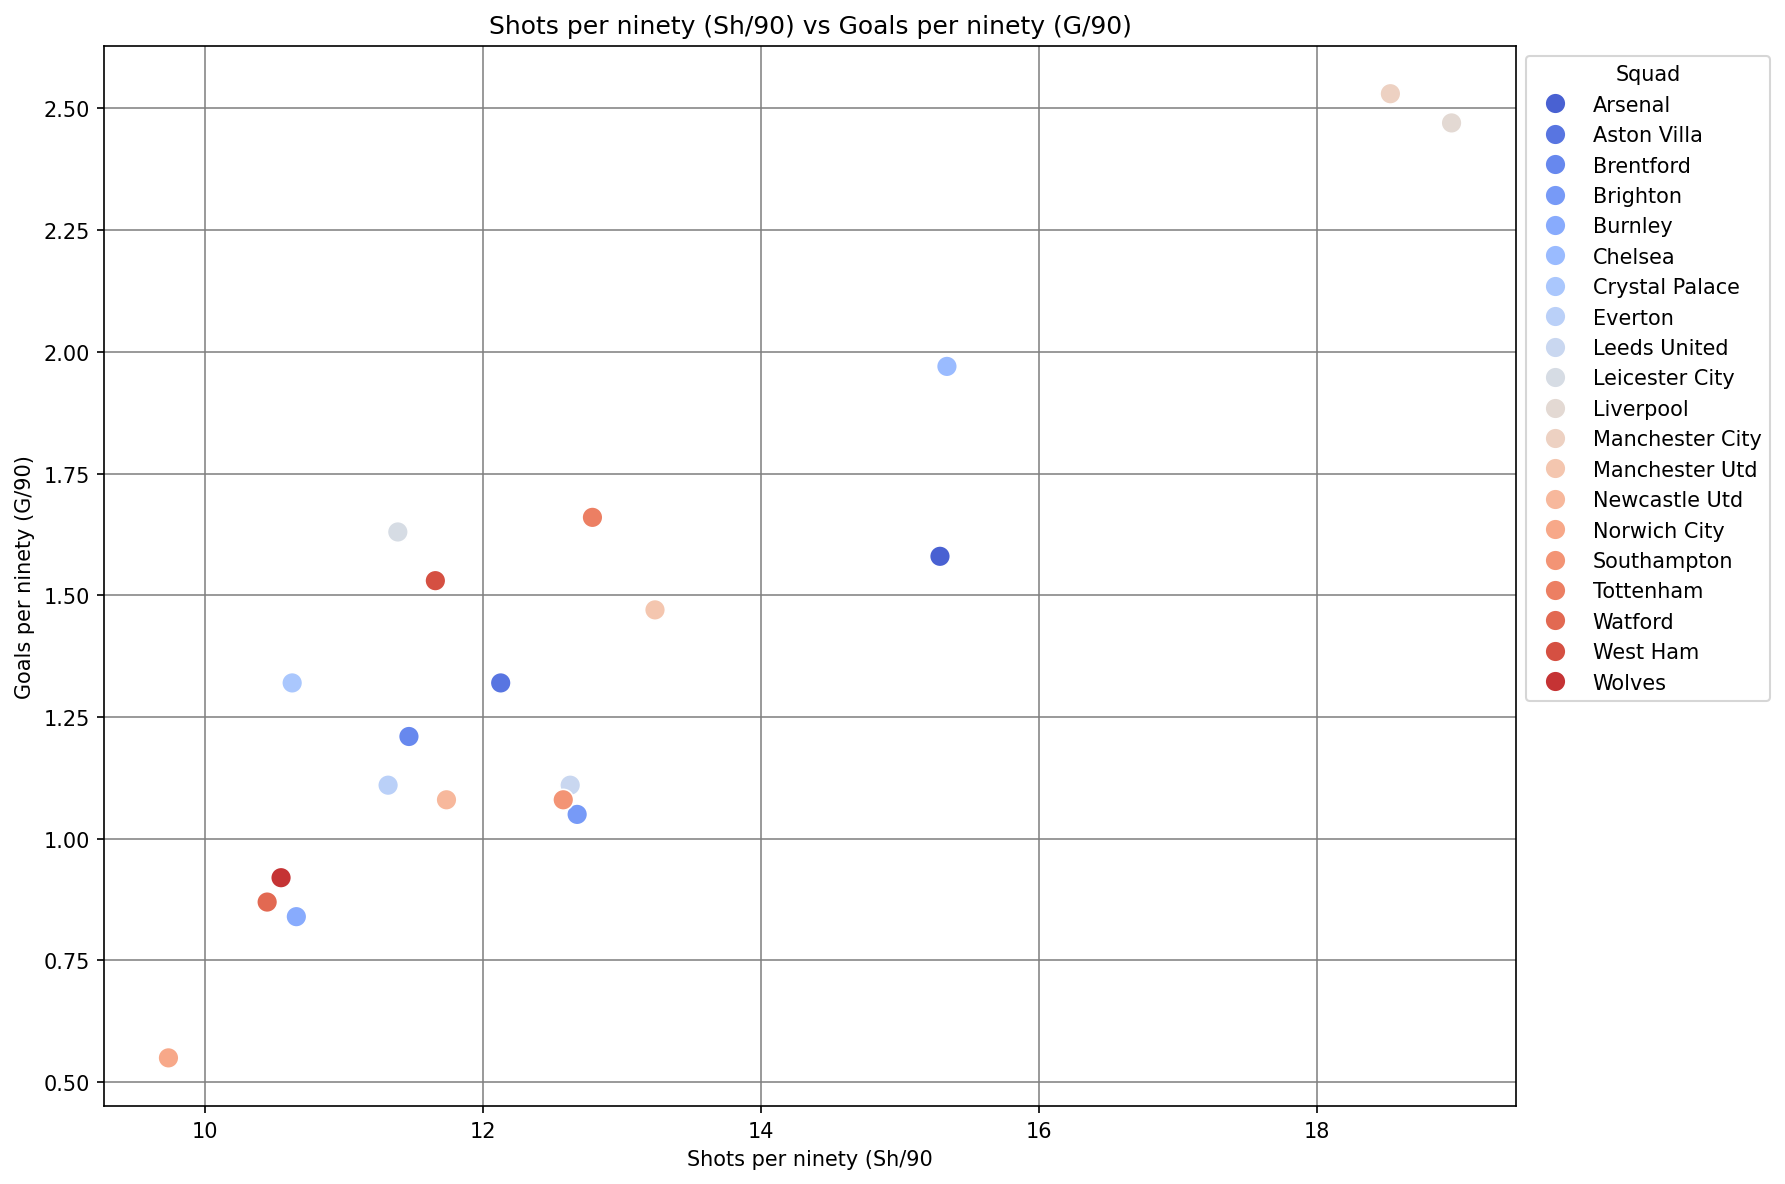

In [121]:
plt.figure(figsize=(12,8),dpi=150)

ax = sns.scatterplot(data=squad_shooting, x='Sh/90', y='G/90', hue='Squad', palette='coolwarm', s=100, edgecolor='w')
sns.move_legend(ax,'upper left', bbox_to_anchor=(1,1))

ax.grid(which='major', linestyle='-', linewidth='0.75', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.title('Shots per ninety (Sh/90) vs Goals per ninety (G/90)')
plt.xlabel('Shots per ninety (Sh/90')
plt.ylabel('Goals per ninety (G/90)')

plt.tight_layout()
plt.show()

*The Scatterplots reveal that the teams that tend to create a higher quality of open play chances per shot (npxG/Sh) also tend to have a higher Goals/Shot or Goals/Shot on Target. Also teams that attempt more shots per ninety tend to have a higher Goals per ninety.*

In [122]:
squad_shooting.sort_values(by=['G/SoT','npxG'], ascending=False)

,Squad,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh,G/90
11,Manchester City,96,704,237,18.53,6.24,0.13,0.38,88.7,81.4,0.12,2.53
18,West Ham,58,443,142,11.66,3.74,0.12,0.38,51.4,46.8,0.11,1.53
10,Liverpool,94,721,237,18.97,6.24,0.12,0.37,88.7,82.7,0.12,2.47
9,Leicester City,62,433,164,11.39,4.32,0.14,0.37,47.8,46.2,0.11,1.63
5,Chelsea,75,583,200,15.34,5.26,0.11,0.34,63.4,56.6,0.10,1.97
16,Tottenham,63,486,185,12.79,4.87,0.12,0.31,61.2,57.3,0.12,1.66
6,Crystal Palace,50,404,140,10.63,3.68,0.11,0.31,46.4,40.1,0.10,1.32
0,Arsenal,60,581,186,15.29,4.89,0.09,0.30,60.5,55.1,0.10,1.58
12,Manchester Utd,56,503,179,13.24,4.71,0.11,0.30,55.8,51.9,0.11,1.47
1,Aston Villa,50,461,159,12.13,4.18,0.10,0.30,44.0,42.0,0.09,1.32


7. **Shot Creation and Efficiency: Which teams are most efficient at converting shot attempts into goals?**
 
 **Teams such as Liverpool and Manchester City create more shots per match. Their style of play, which is based on control and high pressing, allows them to generate a large number of shots. They also rank in the top 3 for non-penalty expected goals (npxG), implying that even though they create a high volume of shots, they maintain high quality consistently.**

 **On the other hand, teams like West Ham, Leicester City, Chelsea, and Tottenham are also efficient at converting their shots into goals. West Ham, in particular, benefits from high-quality finishing. Despite creating fewer shots on target, they match Liverpool and Manchester City in terms of quality and efficiency. This could be attributed to their defensive approach, where they defend deep for large portions of the game and exploit transitions, creating high-quality chances when opponents are vulnerable.**

 **Norwich City is the worst-performing team by a significant margin. This is reflected in their league standing, as they finished at the bottom of the table**`

*This completes my analysis. Now I'll build a visual dashboard that will answer all the questions with graphs and interactive plots. For this, I'll import a few more CSV's into the dashboard directory.*

In [123]:
shooting = squad_shooting[['Squad','Gls','G/90','SoT/90','Sh/90','G/SoT','G/Sh','npxG/Sh']]

In [124]:
shooting.head()

,Squad,Gls,G/90,SoT/90,Sh/90,G/SoT,G/Sh,npxG/Sh
0,Arsenal,60,1.58,4.89,15.29,0.30,0.09,0.10
1,Aston Villa,50,1.32,4.18,12.13,0.30,0.10,0.09
2,Brentford,46,1.21,3.71,11.47,0.28,0.09,0.10
3,Brighton,40,1.05,3.71,12.68,0.26,0.07,0.09
4,Burnley,32,0.84,3.13,10.66,0.26,0.08,0.10


In [125]:
overall = overall.drop(columns=['xGD/90','xG/xGA','GF/xG','GA/xGA'])

In [126]:
overall.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD
0,Manchester City,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64.0
1,Liverpool,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9
2,Chelsea,38,21,11,6,76,33,43,74,1.95,63.4,33.2,30.1
3,Tottenham,38,22,5,11,69,40,29,71,1.87,61.2,39.3,21.9
4,Arsenal,38,22,3,13,61,48,13,69,1.82,60.5,45.7,14.9


In [127]:
defenses.head()

,Squad,TklW,Blocks,Int,Clr,GA,xGA,DefAct,Poss
0,Arsenal,311,386,296,658,48,45.7,1651,52.8
1,Aston Villa,382,453,339,693,54,49.0,1867,46.5
2,Brentford,342,383,393,863,56,48.5,1981,44.8
3,Brighton,403,480,358,723,44,42.9,1964,54.4
4,Burnley,324,509,410,887,53,57.1,2130,40.2


In [128]:
stopping.head()

,Squad,/90,Stp%,GA
0,Arsenal,0.02,6.6,48
1,Aston Villa,-0.14,7.8,54
2,Brentford,-0.12,5.9,56
3,Brighton,-0.04,11.2,44
4,Burnley,-0.09,7.2,53


In [129]:
chance_creation.head()

,Squad,OpSCA,npxG,xA,Chance Creation,PrgP,PrgC,Prg(P+C),Efficiency1
0,Arsenal,923,55.1,34.6,1012.7,1655,734,2389,0.423901
1,Aston Villa,704,42.0,30.0,776.0,1300,653,1953,0.397337
2,Brentford,600,41.1,33.8,674.9,1189,450,1639,0.411775
3,Brighton,746,40.7,31.5,818.2,1547,676,2223,0.368061
4,Burnley,543,38.1,28.0,609.1,972,388,1360,0.447868


In [130]:
df = overall[['Squad','MP','Pts','W','L','D','GD', 'GF', 'GA', 'xG', 'xGA']].merge(chance_creation[['Squad', 'xA', 'OpSCA','Chance Creation', 'PrgP', 'PrgC' ,'Prg(P+C)']], on='Squad') \
    .merge(defenses[['Squad', 'DefAct', 'Poss']], on='Squad') \
    .merge(stopping[['Squad', '/90', 'Stp%']], on='Squad') \
    .merge(shooting.drop(columns=['Gls']), on='Squad')

In [131]:
df.head()

,Squad,MP,Pts,W,L,D,GD,GF,GA,xG,...,DefAct,Poss,/90,Stp%,G/90,SoT/90,Sh/90,G/SoT,G/Sh,npxG/Sh
0,Manchester City,38,93,29,3,6,73,99,26,88.7,...,1233,67.9,-0.01,6.8,2.53,6.24,18.53,0.38,0.13,0.12
1,Liverpool,38,92,28,2,8,68,94,26,88.7,...,1542,62.7,0.04,6.1,2.47,6.24,18.97,0.37,0.12,0.12
2,Chelsea,38,74,21,6,11,43,76,33,63.4,...,1744,61.8,-0.01,7.2,1.97,5.26,15.34,0.34,0.11,0.10
3,Tottenham,38,71,22,11,5,29,69,40,61.2,...,1967,51.8,-0.04,5.8,1.66,4.87,12.79,0.31,0.12,0.12
4,Arsenal,38,69,22,13,3,13,61,48,60.5,...,1651,52.8,0.02,6.6,1.58,4.89,15.29,0.30,0.09,0.10


In [132]:
# df.to_csv(r'C:/Users/uclwo/OneDrive/Desktop/all_stats.csv', index=False)